<a href="https://colab.research.google.com/github/bramyeon/sicss-happiness/blob/main/s2_merge_korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extension of Summer Institute in Computational Social Science (SICSS-Korea) 2024 Team Project

**Author:** Kyungmin Lee (kmlee@udel.edu)

**Team Members (ABC order):** Bryan Nathanael Wiljaya, Inkoo Kang, Ju Hee Jeung, Kyungmin Lee, Yumi Park

**Date:** July 13, 2024


# NOTE

* I've got data loading issue. Since loading whole areas of South Korea has lack of RAM in colab, notebook will be collapsed and no londer plot figuers.

* Also, some "gu" or "gun" has no shapefiles or happiness data. Therefore, you might see some blank areas when seeing South Korea geospatial maps.

* Therefore, I concentrated on Seoul data. The governmental data about air quality is also available in Seoul.

* However, if anyone find any other data, please feel free to let me know. I can change the scope of research data analysis.




In [1]:
!pip install pyreadstat

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pyreadstat
import os
import geopandas as gp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# - Directory to Shared Drive
ROOT_DIR = '/content/drive/Shareddrives/SICSS_2024_groupproject/2_data'
DATA_DIR = 'data-korea/clean/'
DATA_DIR = os.path.join(ROOT_DIR, DATA_DIR)

In [5]:
# - Load the preprocessed dataset
df2020_ = pd.read_csv(os.path.join(DATA_DIR, "korea-happiness-2020.csv"))
df2020_pre = pd.read_csv(os.path.join(DATA_DIR, "korea-happiness-2020-pre.csv"))
df2021 = pd.read_csv(os.path.join(DATA_DIR, "korea-happiness-2021.csv"))
df2022 = pd.read_csv(os.path.join(DATA_DIR, "korea-happiness-2022.csv"))
map = gp.read_file(os.path.join(DATA_DIR, 'map_all.shp'))

* Survey 2020 (prelim): https://drive.google.com/file/d/1PG7D5jD3n4KYcn6jDVyT8HS1PFmIthRi/view?usp=drive_link

* Survey 2021: https://drive.google.com/file/d/1-vQ64VsirW8K68Gtvvi1fvKd5Mj9qUuQ/view?usp=drive_link

* Survey 2022: https://drive.google.com/file/d/1s2I7yggojcW30SxSbft7hueYWgtF0ADR/view?usp=drive_link

This research will use Preliminary Survey since Preliminary survey questions are similar with the 2021 and 2022 survey questions


In [6]:
df2020 = df2020_pre.copy()

In [8]:
# - rename columns are already have been made in preprocessing notebook

# df2020_pre.rename(columns={"a1": "happiness_score", "c1": "happiness_ladder"}, inplace=True)
# df2021.rename(columns={"a1_1": "happiness_score", "c1": "happiness_ladder"}, inplace=True)
# df2022.rename(columns={"A1": "happiness_score", "C1": "happiness_ladder"}, inplace=True)

공공정부데이터 공모전

한국환경산업기술원_서울 생활인구 및 대기오염 측정 현황
https://www.data.go.kr/data/15108051/fileData.do


In [22]:
# read data
df_air = pd.read_csv(os.path.join(DATA_DIR, "seoul_airquality.csv"), encoding='euc-kr')

# Dictionary to map Korean column names to English
column_mapping = {
    '기준일': 'date',
    '시군구코드': 'sido',
    '시군구명': 'gungu',
    '총생활인구수': 'TotalLivingPopulation',
    '아황산가스': 'SO2',
    '일산화탄소': 'CO',
    '오존': 'Ozone',
    '이산화질소': 'NO2',
    'PM10': 'PM10',
    'PM2_5': 'PM2.5'
}

# Rename columns
df_air.rename(columns=column_mapping, inplace=True)
df_air

경제데이터 (공공데이터):

서울특별시_자치구별 지역내 총생산 (2021)
https://www.data.go.kr/data/15085963/fileData.do


데이터 출처
https://data.seoul.go.kr/dataList/11057/S/2/datasetView.do


자치구별 지역내총생산(2015년 기준)
자료갱신일 : 2024-01-03 / 수록기간 : 년 2010 ~ 2021
출처 : 서울특별시, 서울특별시 지역내총생산


In [66]:
# read data
df_gdp = pd.read_csv(os.path.join(DATA_DIR, "seoul_econ.csv"), header=1)

# Dictionary to map Korean column names to English
column_mapping = {
    '자치구별(1)': 'District (1)',
    '자치구별(2)': 'gungu',
    '지역내총생산(당해년가격) (백만원)': 'Gross Regional Domestic Product (Current Price) (Million Won)',
    '구성비 (%)': 'Composition (%)',
    '지역내총생산(2015년 기준년 연쇄가격) (백만원)': 'Gross Regional Domestic Product (2015 Constant Price) (Million Won)',
    '전년대비 증감률 (%)': 'Year-on-Year Growth Rate (%)'
}

# Rename columns
df_gdp.rename(columns=column_mapping, inplace=True)

District (1) gungu  \
0           서울시    소계   
1           서울시   종로구   
2           서울시    중구   
3           서울시   용산구   
4           서울시   성동구   
5           서울시   광진구   
6           서울시  동대문구   
7           서울시   중랑구   
8           서울시   성북구   
9           서울시   강북구   
10          서울시   도봉구   
11          서울시   노원구   
12          서울시   은평구   
13          서울시  서대문구   
14          서울시   마포구   
15          서울시   양천구   
16          서울시   강서구   
17          서울시   구로구   
18          서울시   금천구   
19          서울시  영등포구   
20          서울시   동작구   
21          서울시   관악구   
22          서울시   서초구   
23          서울시   강남구   
24          서울시   송파구   
25          서울시   강동구   

    Gross Regional Domestic Product (Current Price) (Million Won)  \
0                                           472040199               
1                                            35719537               
2                                            61342710               
3                                            13294640               
4                                            13999893               
5                                             6554954               
6                                             7711273               
7                                             4860242               
8                                             6371894               
9                                             3462961               
10                                            3490683               
11                                            6728358               
12                                            5112192               
13                                            9039083               
14                                           21399314               
15                                            7356067               
16                                           18347568               
17                                           14663398               
18                                           17801015               
19                                           44265877               
20                                            6712864               
21                                            6347562               
22                                           38335706               
23                                           77924019               
24                                           31834324               
25                                            9364063               

    Composition (%)  \
0             100.0   
1               7.6   
2              13.0   
3               2.8   
4               3.0   
5               1.4   
6               1.6   
7               1.0   
8               1.3   
9               0.7   
10              0.7   
11              1.4   
12              1.1   
13              1.9   
14              4.5   
15              1.6   
16              3.9   
17              3.1   
18              3.8   
19              9.4   
20              1.4   
21              1.3   
22              8.1   
23             16.5   
24              6.7   
25              2.0   

    Gross Regional Domestic Product (2015 Constant Price) (Million Won)  \
0                                           431678812                     
1                                            32961063                     
2                                            58648964                     
3                                            12265442                     
4                                            12745979                     
5                                             6005449                     
6                                             7065684                     
7                                             4470300                     
8                                             5831556                     
9                                             3174135                     
10              

Social data:

https://www.data.go.kr/data/15047721/fileData.do


 한국사회보장정보원_기초주거급여 주거유형별 수급가구수[월간]


data source:

https://www.bokjiro.go.kr/ssis-tbu/twatga/sociGuaStat/SociGuaStatDetailIframe.do?datsNo=11&datsClNo=1013&datsClCrit=WS



In [128]:
# Define the folder path
folder_path = '/content/drive/Shareddrives/SICSS_2024_groupproject/2_data/data-korea/clean/seoul_social'

# Dictionary to map Korean column names to English
column_mapping = {
    '통계연월': 'YearMonth',
    '통계시도명': 'si',
    '통계시군구명': 'gungu',
    '주거유형': 'Housing_Type',
    '수급가구수': 'Number_Of_Households'
}

# List to store dataframes
dataframes = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    # Check if the file is a csv file
    if filename.endswith('.csv'):
        try:
            df_social = pd.read_csv(file_path, encoding='euc-kr')
        except UnicodeDecodeError:
            df_social = pd.read_csv(file_path, encoding='utf-8')

        # Check the current column names
        print("Current columns:", df_social.columns)

        # Rename columns
        df_social.rename(columns=column_mapping, inplace=True)

        # Confirm renaming
        print("Renamed columns:", df_social.columns)

        dataframes.append(df_social)

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

df_social = combined_df[combined_df["si"] == "서울특별시"]

Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Number_Of_Households'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Number_Of_Households'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Number_Of_Households'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Number_Of_Households'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Number_Of_Households'], dtype='object')
Current columns: Index(['통계연월'

# Preprocessing

In [9]:
# - Renaming values (Korean to English)
# - Renaming column names

# Dictionary for translation
translation_dict1 = {
    '강원도': 'Gangwon-do',
    '경기도': 'Gyeonggi-do',
    '경상남도': 'Gyeongsangnam-do',
    '경상북도': 'Gyeongsangbuk-do',
    '광주광역시': 'Gwangju',
    '대구광역시': 'Daegu',
    '부산광역시': 'Busan',
    '대전광역시': 'Daejeon',
    '서울특별시': 'Seoul',
    '울산광역시': 'Ulsan',
    '인천광역시': 'Incheon',
    '전라남도': 'Jeollanam-do',
    '전라북도': 'Jeollabuk-do',
    '제주특별자치도': 'Jeju',
    '제주도': 'Jeju',
    '충청남도': 'Chungcheongnam-do',
    '충청북도': 'Chungcheongbuk-do',
    '세종특별자치시': 'Sejong-si',
    '강원특별자치도': 'Gangwon-do',
    '전북특별차지도': 'Jeollabuk-do',
    None: None  # Keeping None as None
}

# Dictionary for translation
translation_dict2 = {
    '춘천시': 'Chuncheon',
    '원주시': 'Wonju',
    '강릉시': 'Gangneung',
    '동해시': 'Donghae',
    '태백시': 'Taebaek',
    '속초시': 'Sokcho',
    '삼척시': 'Samcheok',
    '홍천군': 'Hongcheon',
    '횡성군': 'Hoengseong',
    '영월군': 'Yeongwol',
    '평창군': 'Pyeongchang',
    '정선군': 'Jeongseon',
    '양양군': 'Yangyang',
    '화천군': 'Hwacheon',
    '고성군': 'Goseong',
    '양구군': 'Yanggu',
    '철원군': 'Cheorwon',
    '인제군': 'Inje',
    '수원시': 'Suwon',
    '성남시': 'Seongnam',
    '의정부시': 'Uijeongbu',
    '안양시': 'Anyang',
    '광명시': 'Gwangmyeong',
    '평택시': 'Pyeongtaek',
    '안산시': 'Ansan',
    '과천시': 'Gwacheon',
    '구리시': 'Guri',
    '남양주시': 'Namyangju',
    '오산시': 'Osan',
    '시흥시': 'Siheung',
    '군포시': 'Gunpo',
    '의왕시': 'Uiwang',
    '하남시': 'Hanam',
    '용인시': 'Yongin',
    '이천시': 'Icheon',
    '안성시': 'Anseong',
    '광주시': 'Gwangju',
    '여주시': 'Yeoju',
    '가평군': 'Gapyeong',
    '양평군': 'Yangpyeong',
    '부천시': 'Bucheon',
    '동두천시': 'Dongducheon',
    '고양시': 'Goyang',
    '양주시': 'Yangju',
    '포천시': 'Pocheon',
    '화성시': 'Hwaseong',
    '연천군': 'Yeoncheon',
    '김포시': 'Gimpo',
    '파주시': 'Paju',
    '창원시': 'Changwon',
    '진주시': 'Jinju',
    '통영시': 'Tongyeong',
    '사천시': 'Sacheon',
    '김해시': 'Gimhae',
    '밀양시': 'Miryang',
    '거제시': 'Geoje',
    '양산시': 'Yangsan',
    '의령군': 'Uiryeong',
    '함안군': 'Haman',
    '창녕군': 'Changnyeong',
    '남해군': 'Namhae',
    '하동군': 'Hadong',
    '산청군': 'Sancheong',
    '함양군': 'Hamyang',
    '거창군': 'Geochang',
    '합천군': 'Hapcheon',
    '포항시': 'Pohang',
    '경주시': 'Gyeongju',
    '김천시': 'Gimcheon',
    '안동시': 'Andong',
    '구미시': 'Gumi',
    '영주시': 'Yeongju',
    '영천시': 'Yeongcheon',
    '상주시': 'Sangju',
    '문경시': 'Mungyeong',
    '경산시': 'Gyeongsan',
    '의성군': 'Uiseong',
    '청송군': 'Cheongsong',
    '영양군': 'Yeongyang',
    '영덕군': 'Yeongdeok',
    '청도군': 'Cheongdo',
    '고령군': 'Goryeong',
    '성주군': 'Seongju',
    '칠곡군': 'Chilgok',
    '예천군': 'Yecheon',
    '봉화군': 'Bonghwa',
    '울진군': 'Uljin',
    '울릉군': 'Ulleung',
    '동구': 'Dong-gu',
    '서구': 'Seo-gu',
    '남구': 'Nam-gu',
    '북구': 'Buk-gu',
    '광산구': 'Gwangsan-gu',
    '중구': 'Jung-gu',
    '수성구': 'Suseong-gu',
    '달서구': 'Dalseo-gu',
    '달성군': 'Dalseong-gun',
    '군위군': 'Gunwi-gun',
    '영도구': 'Yeongdo-gu',
    '부산진구': 'Busanjin-gu',
    '동래구': 'Dongnae-gu',
    '해운대구': 'Haeundae-gu',
    '사하구': 'Saha-gu',
    '금정구': 'Geumjeong-gu',
    '강서구': 'Gangseo-gu',
    '연제구': 'Yeonje-gu',
    '수영구': 'Suyeong-gu',
    '사상구': 'Sasang-gu',
    '기장군': 'Gijang-gun',
    '유성구': 'Yuseong-gu',
    '대덕구': 'Daedeok-gu',
    '종로구': 'Jongno-gu',
    '용산구': 'Yongsan-gu',
    '성동구': 'Seongdong-gu',
    '광진구': 'Gwangjin-gu',
    '동대문구': 'Dongdaemun-gu',
    '중랑구': 'Jungnang-gu',
    '성북구': 'Seongbuk-gu',
    '강북구': 'Gangbuk-gu',
    '도봉구': 'Dobong-gu',
    '노원구': 'Nowon-gu',
    '은평구': 'Eunpyeong-gu',
    '서대문구': 'Seodaemun-gu',
    '마포구': 'Mapo-gu',
    '양천구': 'Yangcheon-gu',
    '구로구': 'Guro-gu',
    '금천구': 'Geumcheon-gu',
    '영등포구': 'Yeongdeungpo-gu',
    '동작구': 'Dongjak-gu',
    '관악구': 'Gwanak-gu',
    '서초구': 'Seocho-gu',
    '강남구': 'Gangnam-gu',
    '송파구': 'Songpa-gu',
    '강동구': 'Gangdong-gu',
    '울주군': 'Ulju-gun',
    '미추홀구': 'Michuhol-gu',
    '연수구': 'Yeonsu-gu',
    '남동구': 'Namdong-gu',
    '부평구': 'Bupyeong-gu',
    '계양구': 'Gyeyang-gu',
    '강화군': 'Ganghwa-gun',
    '옹진군': 'Ongjin-gun',
    '목포시': 'Mokpo',
    '여수시': 'Yeosu',
    '순천시': 'Suncheon',
    '나주시': 'Naju',
    '광양시': 'Gwangyang',
    '담양군': 'Damyang-gun',
    '곡성군': 'Gokseong-gun',
    '구례군': 'Gurye-gun',
    '고흥군': 'Goheung-gun',
    '보성군': 'Boseong-gun',
    '화순군': 'Hwasun-gun',
    '장흥군': 'Jangheung-gun',
    '강진군': 'Gangjin-gun',
    '해남군': 'Haenam-gun',
    '영암군': 'Yeongam-gun',
    '무안군': 'Muan-gun',
    '함평군': 'Hampyeong-gun',
    '영광군': 'Yeonggwang-gun',
    '장성군': 'Jangseong-gun',
    '완도군': 'Wando-gun',
    '진도군': 'Jindo-gun',
    '신안군': 'Sinan-gun',
    '전주시': 'Jeonju',
    '군산시': 'Gunsan',
    '익산시': 'Iksan',
    '정읍시': 'Jeongeup',
    '남원시': 'Namwon',
    '김제시': 'Gimje',
    '완주군': 'Wanju-gun',
    '진안군': 'Jinan-gun',
    '무주군': 'Muju-gun',
    '장수군': 'Jangsu-gun',
    '임실군': 'Imsil-gun',
    '순창군': 'Sunchang-gun',
    '고창군': 'Gochang-gun',
    '부안군': 'Buan-gun',
    '제주시': 'Jeju',
    '서귀포시': 'Seogwipo',
    '천안시': 'Cheonan',
    '공주시': 'Gongju',
    '보령시': 'Boryeong',
    '아산시': 'Asan',
    '서산시': 'Seosan',
    '논산시': 'Nonsan',
    '계룡시': 'Gyeryong',
    '당진시': 'Dangjin',
    '금산군': 'Geumsan-gun',
    '부여군': 'Buyeo-gun',
    '서천군': 'Seocheon-gun',
    '청양군': 'Cheongyang-gun',
    '홍성군': 'Hongseong-gun',
    '예산군': 'Yesan-gun',
    '태안군': 'Taean-gun',
    '청주시': 'Cheongju',
    '충주시': 'Chungju',
    '제천시': 'Jecheon',
    '보은군': 'Boeun-gun',
    '옥천군': 'Okcheon-gun',
    '영동군': 'Yeongdong-gun',
    '증평군': 'Jeungpyeong-gun',
    '진천군': 'Jincheon-gun',
    '괴산군': 'Goesan-gun',
    '음성군': 'Eumseong-gun',
    '단양군': 'Danyang-gun',
    '전주시 덕진구': 'Deokjin-gu, Jeonju',
    '고양시 덕양구': 'Deogyang-gu, Goyang',
    '수원시 권선구': 'Gwonseon-gu, Suwon',
    '안양시 만안구': 'Manan-gu, Anyang',
    '성남시 분당구': 'Bundang-gu, Seongnam',
    '고양시 일산서구': 'Ilsanseo-gu, Goyang',
    '창원시 마산합포구': 'Masan Happo-gu, Changwon',
    '안양시 동안구': 'Dongan-gu, Anyang',
    '천안시 동남구': 'Dongnam-gu, Cheonan',
    '수원시 영통구': 'Yeongtong-gu, Suwon',
    '고양시 일산동구': 'Ilsandong-gu, Goyang',
    '천안시 서북구': 'Seobuk-gu, Cheonan',
    '용인시 수지구': 'Suji-gu, Yongin',
    '수원시 장안구': 'Jangan-gu, Suwon',
    '용인시 처인구': 'Cheoin-gu, Yongin',
    '성남시 수정구': 'Sujeong-gu, Seongnam',
    '성남시 중원구': 'Jungwon-gu, Seongnam',
    '안산시 단원구': 'Danwon-gu, Ansan',
    '안산시 상록구': 'Sangnok-gu, Ansan',
    '창원시 의창구': 'Uichang-gu, Changwon',
    '창원시 성산구': 'Seongsan-gu, Changwon',
    '창원시 마산회원구': 'Masanhoewon-gu, Changwon',
    '용인시 기흥구': 'Giheung-gu, Yongin',
    '창원시 진해구': 'Jinhae-gu, Changwon',
    '청주시 상당구': 'Sangdang-gu, Cheongju',
    '세종시': 'Sejong-si',
    '청주시 청원구': 'Cheongwon-gu, Cheongju',
    '청주시 흥덕구': 'Heungdeok-gu, Cheongju',
    '수원시 팔달구': 'Paldal-gu, Suwon',
    '포항시 남구': 'Nam-gu, Pohang',
    '청주시 서원구': 'Seowon-gu, Cheongju',
    '포항시 북구': 'Buk-gu, Pohang',
    '전주시 완산구': 'Wansan-gu, Jeonju'
}

# Replace the Korean names with English names
df2021['sido'] = df2021['sido'].replace(translation_dict1)
df2021['gugun'] = df2021['gugun'].replace(translation_dict2)

map['SGG_NM_si'] = map['SGG_NM_si'].replace(translation_dict1)
map['SGG_NM_gug'] = map['SGG_NM_gug'].replace(translation_dict2)

In [129]:
translation_dict_air = {
    '서울시': 'Seoul',
    '종로구': 'Jongno-gu',
    '중구': 'Jung-gu',
    '용산구': 'Yongsan-gu',
    '성동구': 'Seongdong-gu',
    '광진구': 'Gwangjin-gu',
    '동대문구': 'Dongdaemun-gu',
    '중랑구': 'Jungnang-gu',
    '성북구': 'Seongbuk-gu',
    '강북구': 'Gangbuk-gu',
    '도봉구': 'Dobong-gu',
    '노원구': 'Nowon-gu',
    '은평구': 'Eunpyeong-gu',
    '서대문구': 'Seodaemun-gu',
    '마포구': 'Mapo-gu',
    '양천구': 'Yangcheon-gu',
    '강서구': 'Gangseo-gu',
    '구로구': 'Guro-gu',
    '금천구': 'Geumcheon-gu',
    '영등포구': 'Yeongdeungpo-gu',
    '동작구': 'Dongjak-gu',
    '관악구': 'Gwanak-gu',
    '서초구': 'Seocho-gu',
    '강남구': 'Gangnam-gu',
    '송파구': 'Songpa-gu',
    '강동구': 'Gangdong-gu'
}


# Replace the Korean names with English names
df_air['gungu'] = df_air['gungu'].replace(translation_dict_air)
df_gdp['gungu'] = df_gdp['gungu'].replace(translation_dict_air)
df_social['gungu'] = df_social['gungu'].replace(translation_dict_air)

<ipython-input-129-aa915fec8df2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social['gungu'] = df_social['gungu'].replace(translation_dict_air)


In [131]:
# Define the mapping for the housing types
housing_type_mapping = {
    '자가주택(전체소유)': 'Own house',
    '민간(전세)': 'Lease',
    '민간(보증부월세)': 'Monthly rent with deposit',
    '민간(월세)': 'Monthly rent without deposit',
    '민간(사글세)': 'Monthly lease',
    '시설입소(급여미지급)': 'Free'
}

# Apply the mapping to the "Housing_Type" column
df_social['Housing_Type_English'] = df_social['Housing_Type'].map(housing_type_mapping)

# List of housing types to filter (in English)
housing_types_english = [
    'Own house', 'Lease', 'Monthly rent with deposit',
    'Monthly rent without deposit', 'Monthly lease', 'Free'
]

# Filter the DataFrame using the English housing types
filtered_df_social = df_social[df_social["Housing_Type_English"].isin(housing_types_english)]

<ipython-input-131-08c61e567e15>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social['Housing_Type_English'] = df_social['Housing_Type'].map(housing_type_mapping)


In [138]:
# Group by 'gungu' and 'Housing_Type' and calculate the average 'Number_Of_Households'
grouped_df = filtered_df_social.groupby(['gungu', 'Housing_Type_English'])['Number_Of_Households'].mean().reset_index()

# Rename the columns for clarity
grouped_df.rename(columns={'Number_Of_Households': 'Average_Number_Of_Households'}, inplace=True)

df_social = grouped_df.copy()
df_social

gungu          Housing_Type_English  Average_Number_Of_Households
0     Dobong-gu                          Free                     11.250000
1     Dobong-gu                         Lease                    712.916667
2     Dobong-gu                 Monthly lease                      1.000000
3     Dobong-gu     Monthly rent with deposit                   3056.416667
4     Dobong-gu  Monthly rent without deposit                    494.333333
..          ...                           ...                           ...
143  Yongsan-gu                         Lease                    436.666667
144  Yongsan-gu                 Monthly lease                      3.666667
145  Yongsan-gu     Monthly rent with deposit                   2157.416667
146  Yongsan-gu  Monthly rent without deposit                   1401.750000
147  Yongsan-gu                     Own house                     13.166667

[148 rows x 3 columns]

# Merging datasets

Based on survey 2021, Question A1 (column a1_1) is about happiness score, and Question C1 (column c1) is about happiness latter. Source here: https://drive.google.com/drive/u/0/home

In [11]:
# Get unique values
unique_gugun = df2021['gugun'].unique()
unique_SGG_NM_gug = map['SGG_NM_gug'].unique()

# Convert to sets for comparison
set_gugun = set(unique_gugun)
set_SGG_NM_gug = set(unique_SGG_NM_gug)

# Find matches
matches = set_gugun.intersection(set_SGG_NM_gug)

# Find unique values in each
unique_in_gugun = set_gugun - set_SGG_NM_gug
unique_in_SGG_NM_gug = set_SGG_NM_gug - set_gugun

# Print results
print("Matches:", matches)
print("Unique in df2021['gugun']:", unique_in_gugun)
print("Unique in map['SGG_NM_gug']:", unique_in_SGG_NM_gug)

Matches: {'Geoje', 'Seosan', 'Hwasun-gun', 'Songpa-gu', 'Uljin', 'Yeongdong-gun', 'Yeongdeok', 'Daedeok-gu', 'Wonju', 'Sasang-gu', 'Michuhol-gu', 'Hampyeong-gun', 'Naju', 'Icheon', 'Seongdong-gu', 'Yeongdeungpo-gu', 'Dongnae-gu', 'Imsil-gun', 'Tongyeong', 'Busanjin-gu', 'Nam-gu', 'Gumi', 'Miryang', 'Yeongam-gun', 'Anseong', 'Geochang', 'Gokseong-gun', 'Sangju', 'Dobong-gu', 'Jinan-gun', 'Gangdong-gu', 'Bucheon', 'Seodaemun-gu', 'Eumseong-gun', 'Hadong', 'Yangcheon-gu', 'Pocheon', 'Pyeongtaek', 'Geumjeong-gu', 'Yeonje-gu', 'Gunpo', 'Asan', 'Ganghwa-gun', 'Yangpyeong', 'Siheung', 'Saha-gu', 'Chilgok', 'Hongcheon', 'Jinju', 'Dong-gu', 'Hwacheon', 'Gwangsan-gu', 'Yeongcheon', 'Donghae', 'Buan-gun', 'Namwon', 'Nowon-gu', 'Jecheon', 'Dongducheon', 'Sokcho', 'Sacheon', 'Danyang-gun', 'Dalseo-gu', 'Yeonsu-gu', 'Inje', 'Muan-gun', 'Yangsan', 'Seo-gu', 'Yangju', 'Gwangju', 'Namyangju', 'Gwanak-gu', 'Samcheok', 'Yeosu', 'Wando-gun', 'Bonghwa', 'Seocho-gu', 'Gangseo-gu', 'Hapcheon', 'Nonsan', 'Yeo

I merged data based on 'Gu' unit because Zipcode columns "COL_ADM_SE" and "COL_ADM_SE" are 'Si' based data. When I tried to plot data, it appears to show 'Si' based data.

Therefore, I split it df2021["gugun"] into ["gugun_gu"] to merge it with map["SGG_NM_gug"].


In [12]:
# Function to split the 'gugun' column and create new columns
def split_gugun(row):
    if ", " in row:
        parts = row.split(", ")
        return pd.Series([parts[0], parts[1]])
    else:
        return pd.Series([row, None])

# Apply the function to the 'gugun' column
df2021[['gugun_gu', 'gugun_si']] = df2021['gugun'].apply(split_gugun)

I also used  how='outer' code to save df2021["gugun_si"] data. Not to loose any data for sure.

In [25]:
# Merge the DataFrames based on the common column
map2021 = map.merge(df2021, left_on='SGG_NM_gug', right_on='gugun_gu', how="outer")

# Convert the merged DataFrame to a GeoDataFrame if it's not already
map2021 = gp.GeoDataFrame(map2021, geometry='geometry')

In [26]:
# Subset by "si"
map_gangwon = map2021[map2021["SGG_NM_si"] == "Gangwon-do"]
map_gyeongbuk = map2021[map2021["SGG_NM_si"] == "Gyeongsangbuk-do"]
map_gyeongnam = map2021[map2021["SGG_NM_si"] == "Gyeongsangnam-do"]
map_gyeonggi = map2021[map2021["SGG_NM_si"] == "Gyeonggi-do"]
map_chungbuk = map2021[map2021["SGG_NM_si"] == "Chungcheongbuk-do"]

map_chungnam = map2021[map2021["SGG_NM_si"] == "Chungcheongnam-do"]
map_jeju = map2021[map2021["SGG_NM_si"] == "Jeju"]
map_jeonbuk = map2021[map2021["SGG_NM_si"] == "Jeollabuk-do"]
map_jeonnam = map2021[map2021["SGG_NM_si"] == "Jeollanam-do"]
map_seoul = map2021[map2021["SGG_NM_si"] == "Seoul"]

map_daejeon = map2021[map2021["SGG_NM_si"] == "Daejeon"]
map_daegu = map2021[map2021["SGG_NM_si"] == "Daegu"]
map_busan = map2021[map2021["SGG_NM_si"] == "Busan"]
map_ulsan = map2021[map2021["SGG_NM_si"] == "Ulsan"]
map_incheon = map2021[map2021["SGG_NM_si"] == "Incheon"]

map_gwangju = map2021[map2021["SGG_NM_si"] == "Gwangju"]
map_gyeonggi = map2021[map2021["SGG_NM_si"] == "Gyeonggi-do"]

In [15]:
print(map_seoul.columns.tolist())

['ADM_SECT_C', 'SGG_NM', 'SGG_OID', 'COL_ADM_SE', 'SGG_NM_si', 'SGG_NM_gug', 'COL_ADM__1', 'COL_ADM__2', 'geometry', 'sido_cd', 'sido', 'gugun_cd', 'gugun', 'strata1', 'strata2', 'strata3', 'strata_cd', 'age', 'happiness_score', 'a2_1', 'a2_2', 'a2_3', 'a3_1', 'a3_2', 'a3_3', 'a3_4', 'a3_5', 'b1_1', 'b1_2', 'b1_3', 'b1_4', 'b1_5', 'b1_6', 'b1_7', 'b1_8', 'b1_9', 'b1_10', 'b2', 'b3', 'happiness_ladder', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7_1', 'c7_2', 'c7_3', 'c7_4', 'c7_5', 'c7_6', 'c7_7', 'c7_8', 'c8', 'd1_1', 'd1_2', 'd1_3', 'd1_4', 'd1_5', 'd1_6', 'd1_7', 'd1_8', 'd1_9', 'd1_10', 'd1_11', 'd1_12', 'd1_13', 'd1_14', 'd1_15', 'd1_16', 'd1_17', 'd1_18', 'd1_19', 'd1_20', 'd2_1', 'd2_2', 'd2_3', 'd2_4', 'd2_5', 'd2_6', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd3_5', 'd3_6', 'd3_7', 'd3_8', 'd3_9', 'd3_10', 'd3_11', 'd4_1', 'd4_2', 'd4_3', 'd5_1_1', 'd5_1_2', 'd5_1_3', 'd5_1_4', 'd5_1_5', 'd5_1_6', 'd5_1_7', 'd5_1_8', 'd5_1_9', 'd5_1_10', 'd5_1_11', 'd5_1_12', 'd5_1_13', 'd5_1_14', 'd5_1_15', 'd6',

# Survey Demographic Data Analysis

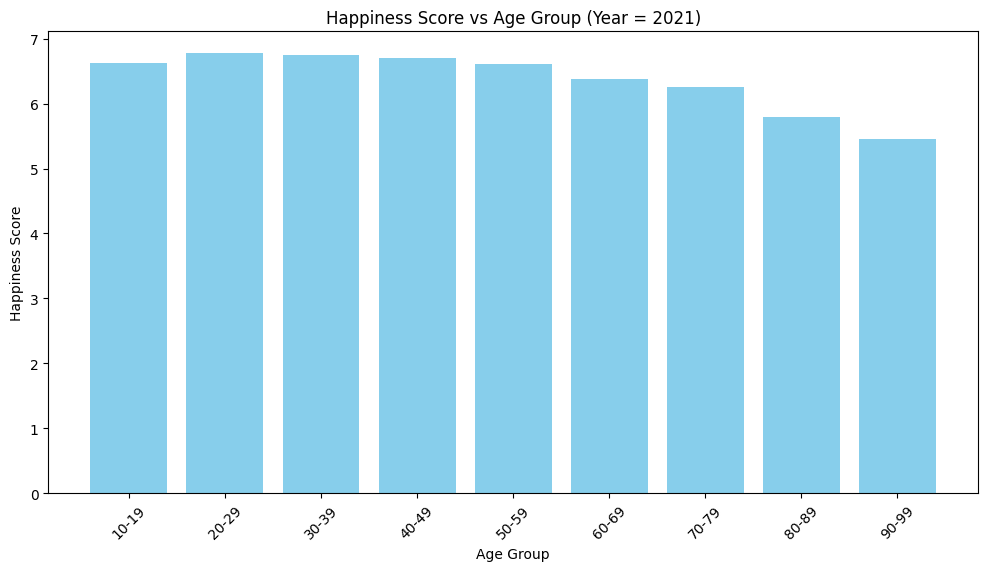

In [13]:
# Create age bins
bins = list(range(10, 110, 10))
labels = [f'{i}-{i+9}' for i in range(10, 100, 10)]
map2021['age_group'] = pd.cut(map2021['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the mean happiness score for each group
grouped = map2021.groupby('age_group')['happiness_score'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(grouped['age_group'], grouped['happiness_score'], color='skyblue')
plt.ylabel('Happiness Score')
plt.xlabel('Age Group')
plt.title('Happiness Score vs Age Group (Year = 2021)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

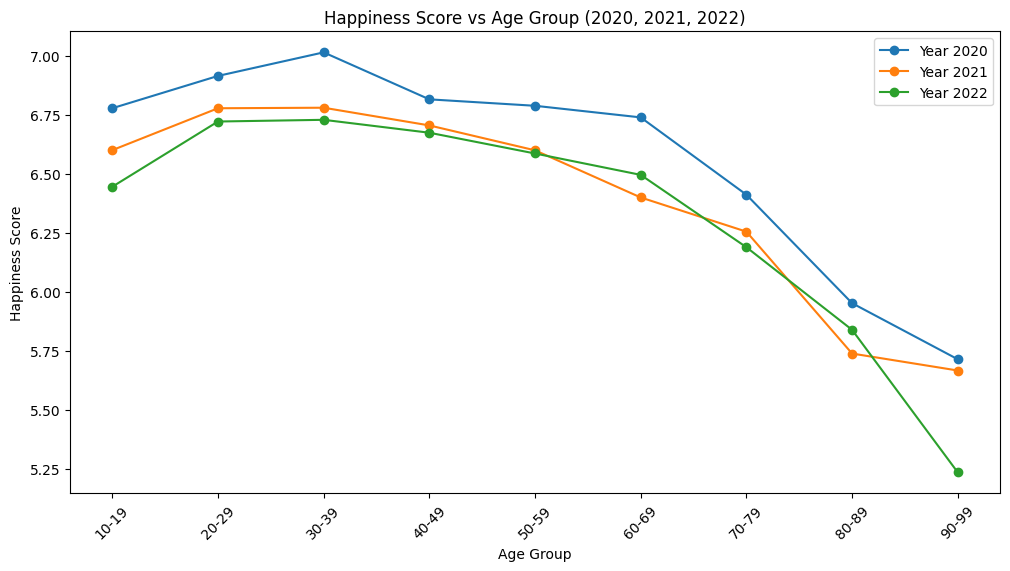

In [73]:
# Create age bins and labels
bins = list(range(10, 110, 10))
labels = [f'{i}-{i+9}' for i in range(10, 100, 10)]

# Function to create age groups and calculate mean happiness score
def create_age_group_mean(df, year):
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    grouped = df.groupby('age_group')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

# Calculate age group mean happiness scores for each year
grouped_2020 = create_age_group_mean(df2020, 2020)
grouped_2021 = create_age_group_mean(df2021, 2021)
grouped_2022 = create_age_group_mean(df2022, 2022)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022])

# Plot the data
plt.figure(figsize=(12, 6))

for year in [2020, 2021, 2022]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['age_group'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Age Group')
plt.title('Happiness Score vs Age Group (2020, 2021, 2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

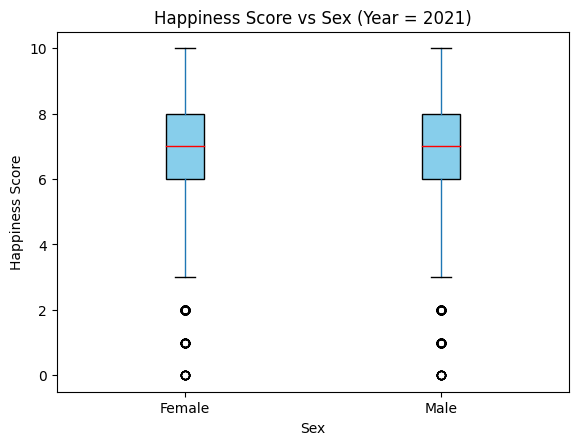

In [96]:
# Convert one-hot encoding back to a single column
map2021['sex'] = map2021.apply(lambda row: 'Male' if row['sex_1.0'] == 1 else 'Female', axis=1)

# Plot the data using a box plot
plt.figure(figsize=(10, 6))
map2021.boxplot(column='happiness_score', by='sex', grid=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'))
plt.ylabel('Happiness Score')
plt.xlabel('Sex')
plt.title('Happiness Score vs Sex (Year = 2021)')
plt.suptitle('')  # Remove the default subtitle
plt.show()

In [99]:
df2020 = pd.get_dummies(df2020, columns=['sex'], dtype=float)
df2020

gagu  sido  gugun  strataid  sido.1  sq5   age  happiness_score  \
0      1941.0   4.0   76.0      55.0     1.0  1.0  48.0              7.0   
1        45.0   1.0  127.0     171.0     2.0  1.0  55.0              7.0   
2        47.0   1.0  127.0     188.0     2.0  1.0  64.0              8.0   
3        43.0   1.0  127.0     171.0     2.0  1.0  54.0              5.0   
4        44.0   1.0  127.0     188.0     2.0  1.0  60.0              8.0   
...       ...   ...    ...       ...     ...  ...   ...              ...   
13819  2604.0   7.0   52.0      41.0     1.0  5.0  35.0              6.0   
13820   294.0   1.0   51.0      86.0     1.0  1.0  76.0              6.0   
13821   294.0   1.0   51.0     188.0     2.0  1.0  79.0              7.0   
13822   287.0   1.0   51.0      86.0     1.0  1.0  86.0              7.0   
13823  2522.0   7.0   42.0      41.0     1.0  5.0  31.0              7.0   

       a2_1  a2_2  ...  co31_4  co31_5  co31_6  co31_7  co31_8  co31_9  \
0       7.0   8.0  ...     4.0     4.0     3.0     3.0     3.0     4.0   
1       8.0   7.0  ...     4.0     4.0     4.0     2.0     2.0     5.0   
2       7.0   6.0  ...     2.0     4.0     3.0     3.0     3.0     3.0   
3       5.0   6.0  ...     2.0     3.0     4.0     4.0     4.0     4.0   
4       6.0   6.0  ...     2.0     3.0     4.0     3.0     3.0     5.0   
...     ...   ...  ...     ...     ...     ...     ...     ...     ...   
13819   3.0   4.0  ...     4.0     4.0     4.0     3.0     4.0     4.0   
13820   7.0   6.0  ...     3.0     3.0     4.0     4.0     4.0     3.0   
13821   7.0   6.0  ...     4.0     4.0     3.0     3.0     3.0     4.0   
13822   6.0   7.0  ...     3.0     3.0     3.0     3.0     4.0     4.0   
13823   5.0   5.0  ...     4.0     4.0     4.0     4.0     4.0     4.0   

       co31_10  co31_11  sex_1.0  sex_2.0  
0          2.0      4.0      1.0      0.0  
1          5.0      4.0      0.0      1.0  
2          4.0      4.0      0.0      1.0  
3          5.0      4.0      0.0      1.0  
4          5.0      5.0      0.0      1.0  
...        ...      ...      ...      ...  
13819      4.0      4.0      1.0      0.0  
13820      3.0      4.0      1.0      0.0  
13821      4.0      4.0      0.0      1.0  
13822      4.0      3.0      1.0      0.0  
13823      3.0      4.0      1.0      0.0  

[13824 rows x 197 columns]

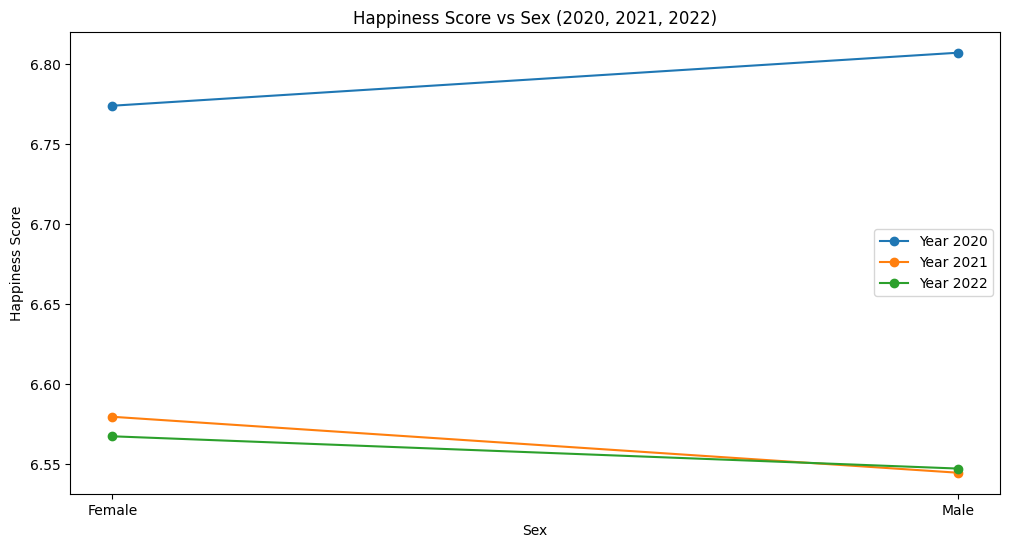

In [100]:
# Convert one-hot encoding back to a single column for each year
def convert_sex_column(df):
    df['sex'] = df.apply(lambda row: 'Male' if row['sex_1.0'] == 1 else 'Female', axis=1)
    return df

df2020 = convert_sex_column(df2020)
df2021 = convert_sex_column(df2021)
df2022 = convert_sex_column(df2022)

# Function to group by 'sex' and calculate mean happiness score
def create_sex_group_mean(df, year):
    grouped = df.groupby('sex')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

# Calculate sex group mean happiness scores for each year
grouped_2020 = create_sex_group_mean(df2020, 2020)
grouped_2021 = create_sex_group_mean(df2021, 2021)
grouped_2022 = create_sex_group_mean(df2022, 2022)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022])

# Plot the data
plt.figure(figsize=(12, 6))

for year in [2020, 2021, 2022]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['sex'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Sex')
plt.title('Happiness Score vs Sex (2020, 2021, 2022)')
plt.legend()
plt.show()


<Figure size 1500x600 with 0 Axes>

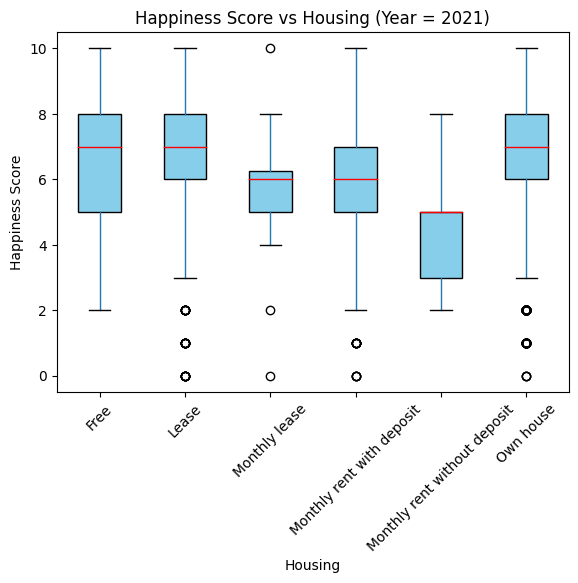

In [75]:
# Assuming 'housing_1.0' to 'housing_6.0' represent different housing statuses
map2021['housing'] = map2021.apply(lambda row: 'Own house' if row['housing_1.0'] == 1 else
                                              'Lease' if row['housing_2.0'] == 1 else
                                              'Monthly rent with deposit' if row['housing_3.0'] == 1 else
                                              'Monthly rent without deposit' if row['housing_4.0'] == 1 else
                                              'Monthly lease' if row['housing_5.0'] == 1 else
                                              'Free' if row['housing_6.0'] == 1 else
                                              'Other', axis=1)

# Filter out the 'Other' category
map2021_filtered = map2021[map2021['housing'] != 'Other']

# Plot the data using a box plot
plt.figure(figsize=(15, 6))
map2021_filtered.boxplot(column='happiness_score', by='housing', grid=False, patch_artist=True,
                         boxprops=dict(facecolor='skyblue', color='black'),
                         medianprops=dict(color='red'))
plt.ylabel('Happiness Score')
plt.xlabel('Housing')
plt.title('Happiness Score vs Housing (Year = 2021)')
plt.suptitle('')  # Remove the default subtitle
plt.xticks(rotation=45)
plt.show()

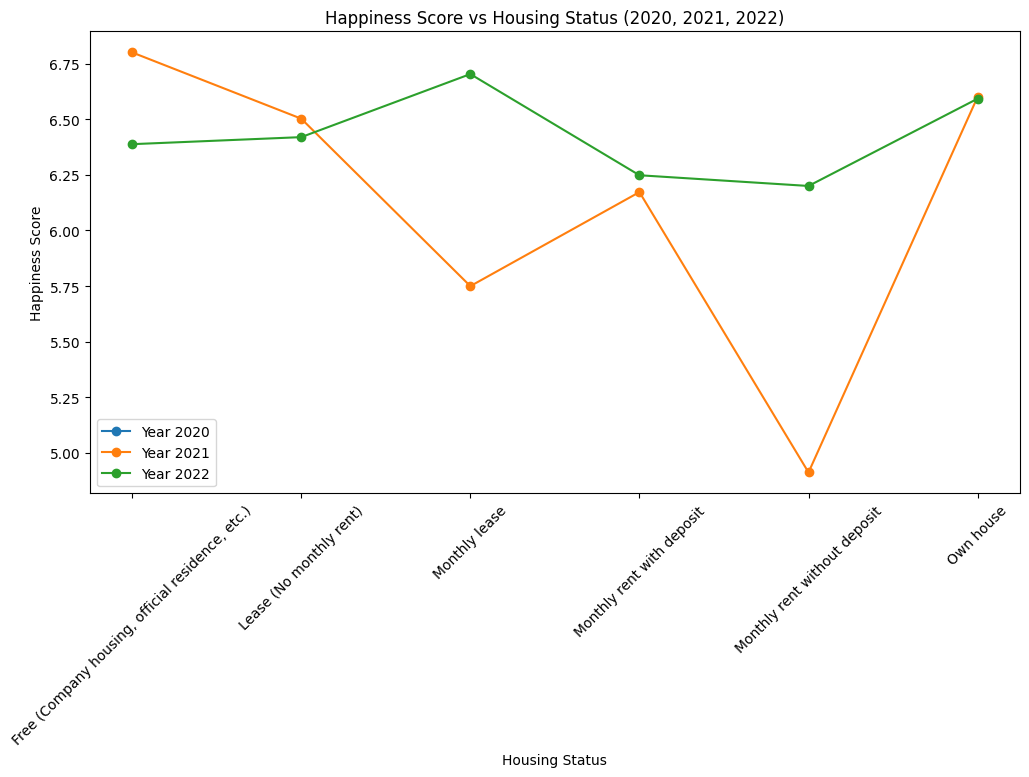

In [108]:
# Convert one-hot encoding back to a single column for each year
def convert_housing_column(df):
    df['housing'] = df.apply(lambda row: 'Own house' if row['housing_1.0'] == 1 else
                                         'Lease (No monthly rent)' if row['housing_2.0'] == 1 else
                                         'Monthly rent with deposit' if row['housing_3.0'] == 1 else
                                         'Monthly rent without deposit' if row['housing_4.0'] == 1 else
                                         'Monthly lease' if row['housing_5.0'] == 1 else
                                         'Free (Company housing, official residence, etc.)' if row['housing_6.0'] == 1 else
                                         'Other', axis=1)
    return df

# Apply the conversion function to each year's DataFrame
#df2020 = convert_housing_column(df2020)
df2021 = convert_housing_column(df2021)
df2022 = convert_housing_column(df2022)

# Function to group by 'housing' and calculate mean happiness score
def create_housing_group_mean(df, year):
    grouped = df.groupby('housing')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

# Calculate housing group mean happiness scores for each year
#grouped_2020 = create_housing_group_mean(df2020, 2020)
grouped_2021 = create_housing_group_mean(df2021, 2021)
grouped_2022 = create_housing_group_mean(df2022, 2022)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022])

# Filter out the 'Other' category
combined = combined[combined['housing'] != 'Other']

# Plot the data
plt.figure(figsize=(12, 6))

for year in [2020, 2021, 2022]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['housing'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Housing Status')
plt.title('Happiness Score vs Housing Status (2020, 2021, 2022)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


<Figure size 1500x600 with 0 Axes>

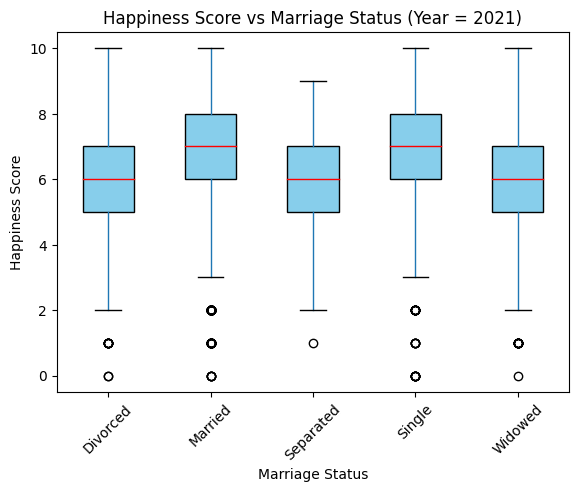

In [76]:
# Assuming 'marriage_1.0' to 'marriage_5.0' represent different marriage statuses
map2021['marriage'] = map2021.apply(lambda row: 'Single' if row['marriage_1.0'] == 1 else
                                              'Married' if row['marriage_2.0'] == 1 else
                                              'Widowed' if row['marriage_3.0'] == 1 else
                                              'Divorced' if row['marriage_4.0'] == 1 else
                                              'Separated' if row['marriage_5.0'] == 1 else
                                              'Other', axis=1)

# Filter out the 'Other' category
map2021_filtered = map2021[map2021['marriage'] != 'Other']

# Plot the data using a box plot
plt.figure(figsize=(15, 6))
map2021_filtered.boxplot(column='happiness_score', by='marriage', grid=False, patch_artist=True,
                         boxprops=dict(facecolor='skyblue', color='black'),
                         medianprops=dict(color='red'))
plt.ylabel('Happiness Score')
plt.xlabel('Marriage Status')
plt.title('Happiness Score vs Marriage Status (Year = 2021)')
plt.suptitle('')  # Remove the default subtitle
plt.xticks(rotation=45)
plt.show()


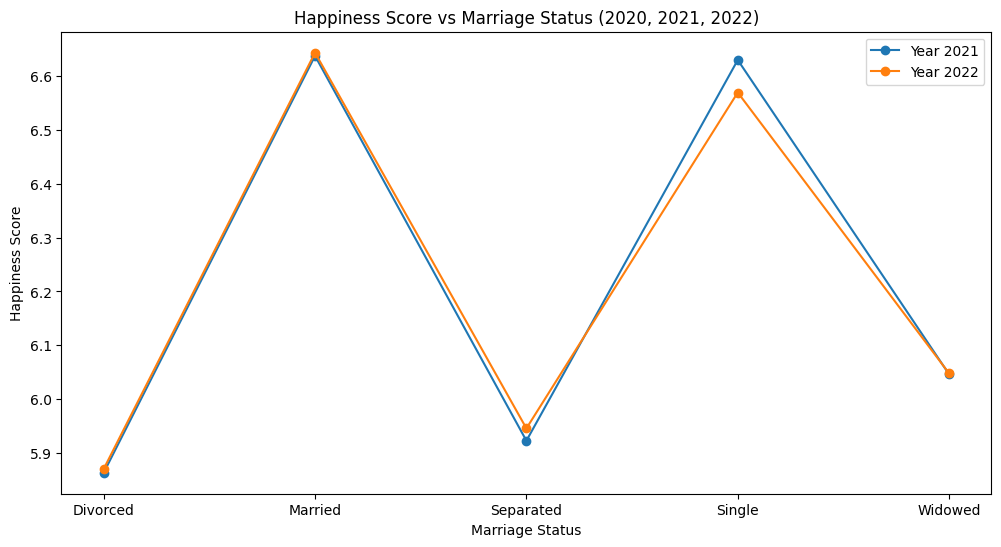

In [104]:
# Convert one-hot encoding back to a single column for each year
def convert_marriage_column(df):
    df['marriage'] = df.apply(lambda row: 'Single' if row['marriage_1.0'] == 1 else
                                         'Married' if row['marriage_2.0'] == 1 else
                                         'Widowed' if row['marriage_3.0'] == 1 else
                                         'Divorced' if row['marriage_4.0'] == 1 else
                                         'Separated' if row['marriage_5.0'] == 1 else
                                         'Other', axis=1)
    return df

#df2020 = convert_marriage_column(df2020)
df2021 = convert_marriage_column(df2021)
df2022 = convert_marriage_column(df2022)

# Function to group by 'marriage' and calculate mean happiness score
def create_marriage_group_mean(df, year):
    grouped = df.groupby('marriage')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

# Calculate marriage group mean happiness scores for each year
#grouped_2020 = create_marriage_group_mean(df2020, 2020)
grouped_2021 = create_marriage_group_mean(df2021, 2021)
grouped_2022 = create_marriage_group_mean(df2022, 2022)

# Combine the dataframes
combined = pd.concat([grouped_2020, grouped_2021, grouped_2022])

# Plot the data
plt.figure(figsize=(12, 6))

for year in [2021, 2022]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['marriage'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Marriage Status')
plt.title('Happiness Score vs Marriage Status (2020, 2021, 2022)')
plt.legend()
plt.show()


# Geospatial

In [ ]:
def figure_making(DATA, NAME):
  # Create the plot
  fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Adjusted figsize for better aspect ratio

  # Plot the first map
  score = DATA.plot(
      column="happiness_score",
      cmap='viridis',
      linewidth=0.8,
      ax=ax[0],
      edgecolor='0.8'
  )

  # Set title for the first plot
  ax[0].set_title('Happiness Score in ' + NAME + ', South Korea (2021)')

  # Create colorbar for the first plot
  divider = make_axes_locatable(ax[0])
  cax = divider.append_axes("right", size="5%", pad=0.1)
  cbar = fig.colorbar(score.collections[0], cax=cax, orientation="vertical")
  cbar.set_label("Happiness Score")

  # Plot the second map
  ladder = DATA.plot(
      column="happiness_ladder",
      cmap='viridis',
      linewidth=0.8,
      ax=ax[1],
      edgecolor='0.8'
  )

  # Set title for the second plot
  ax[1].set_title('Happiness Ladder in ' + NAME + ', South Korea (2021)')

  # Create colorbar for the second plot
  divider = make_axes_locatable(ax[1])
  cax = divider.append_axes("right", size="5%", pad=0.1)
  cbar = fig.colorbar(ladder.collections[0], cax=cax, orientation="vertical")
  cbar.set_label("Happiness Ladder")

  # Adjust layout for better fit
  plt.tight_layout()

  # Show the plot
  plt.show()


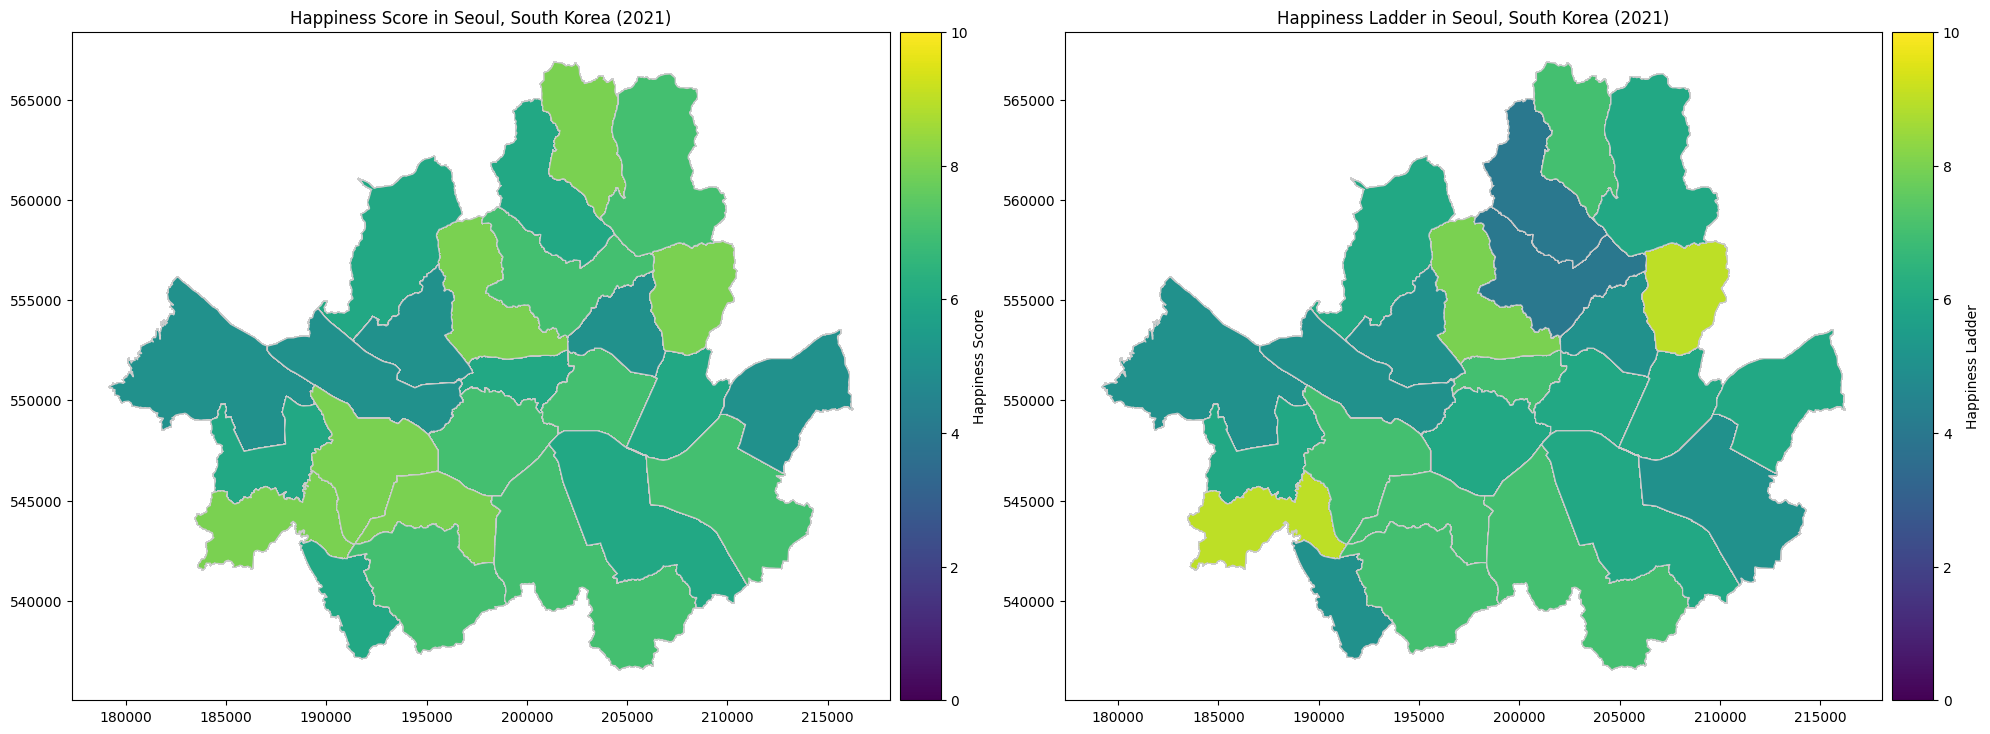

In [ ]:
figure_making(map_seoul, "Seoul")

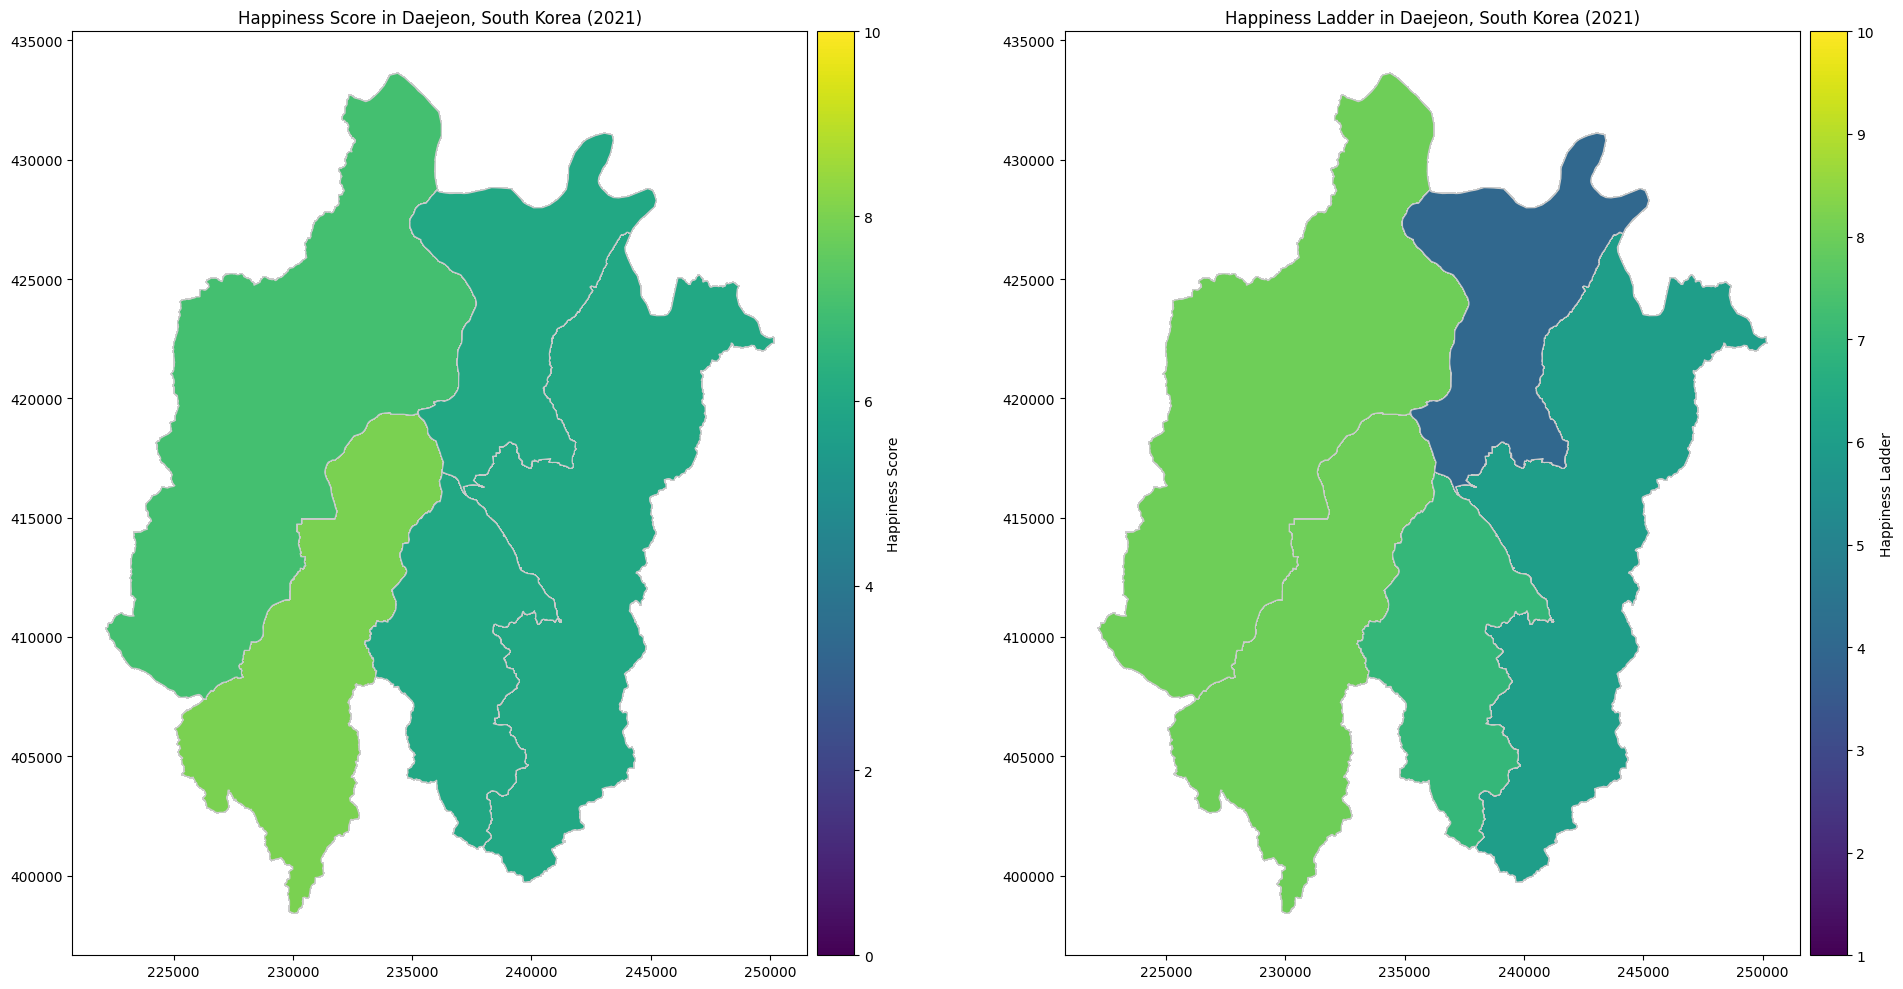

In [17]:
figure_making(map_daejeon, "Daejeon")

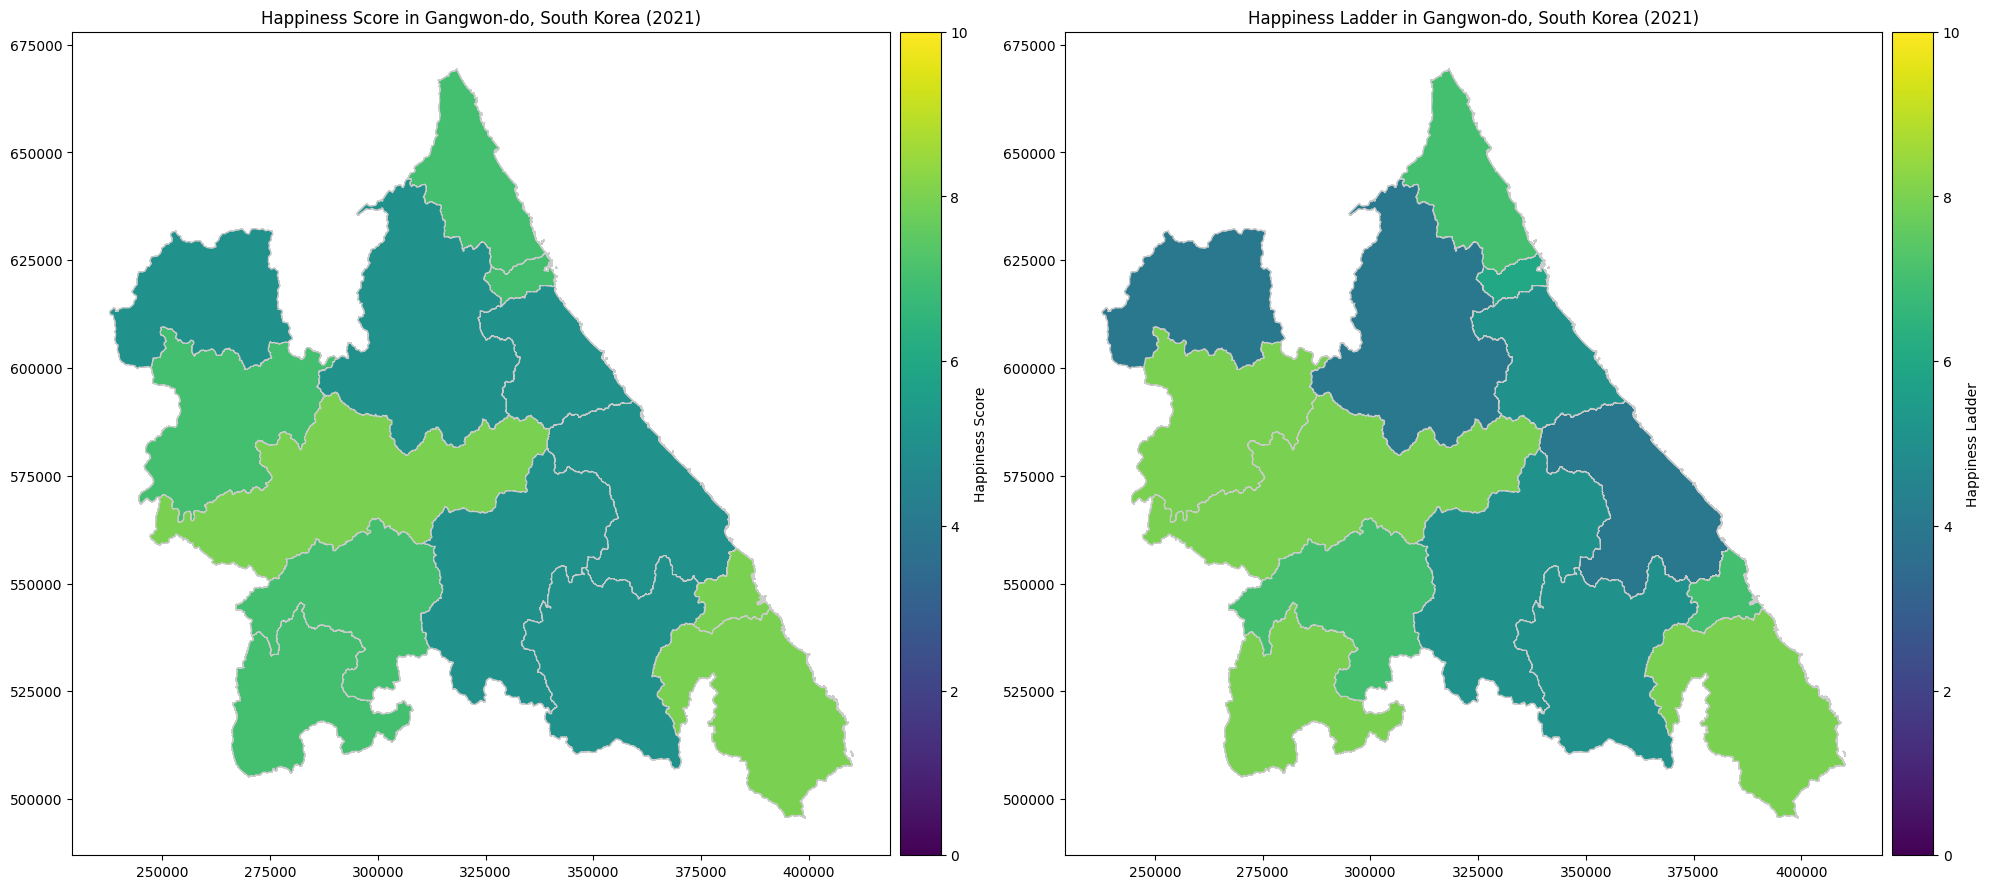

In [18]:
figure_making(map_gangwon, "Gangwon-do")

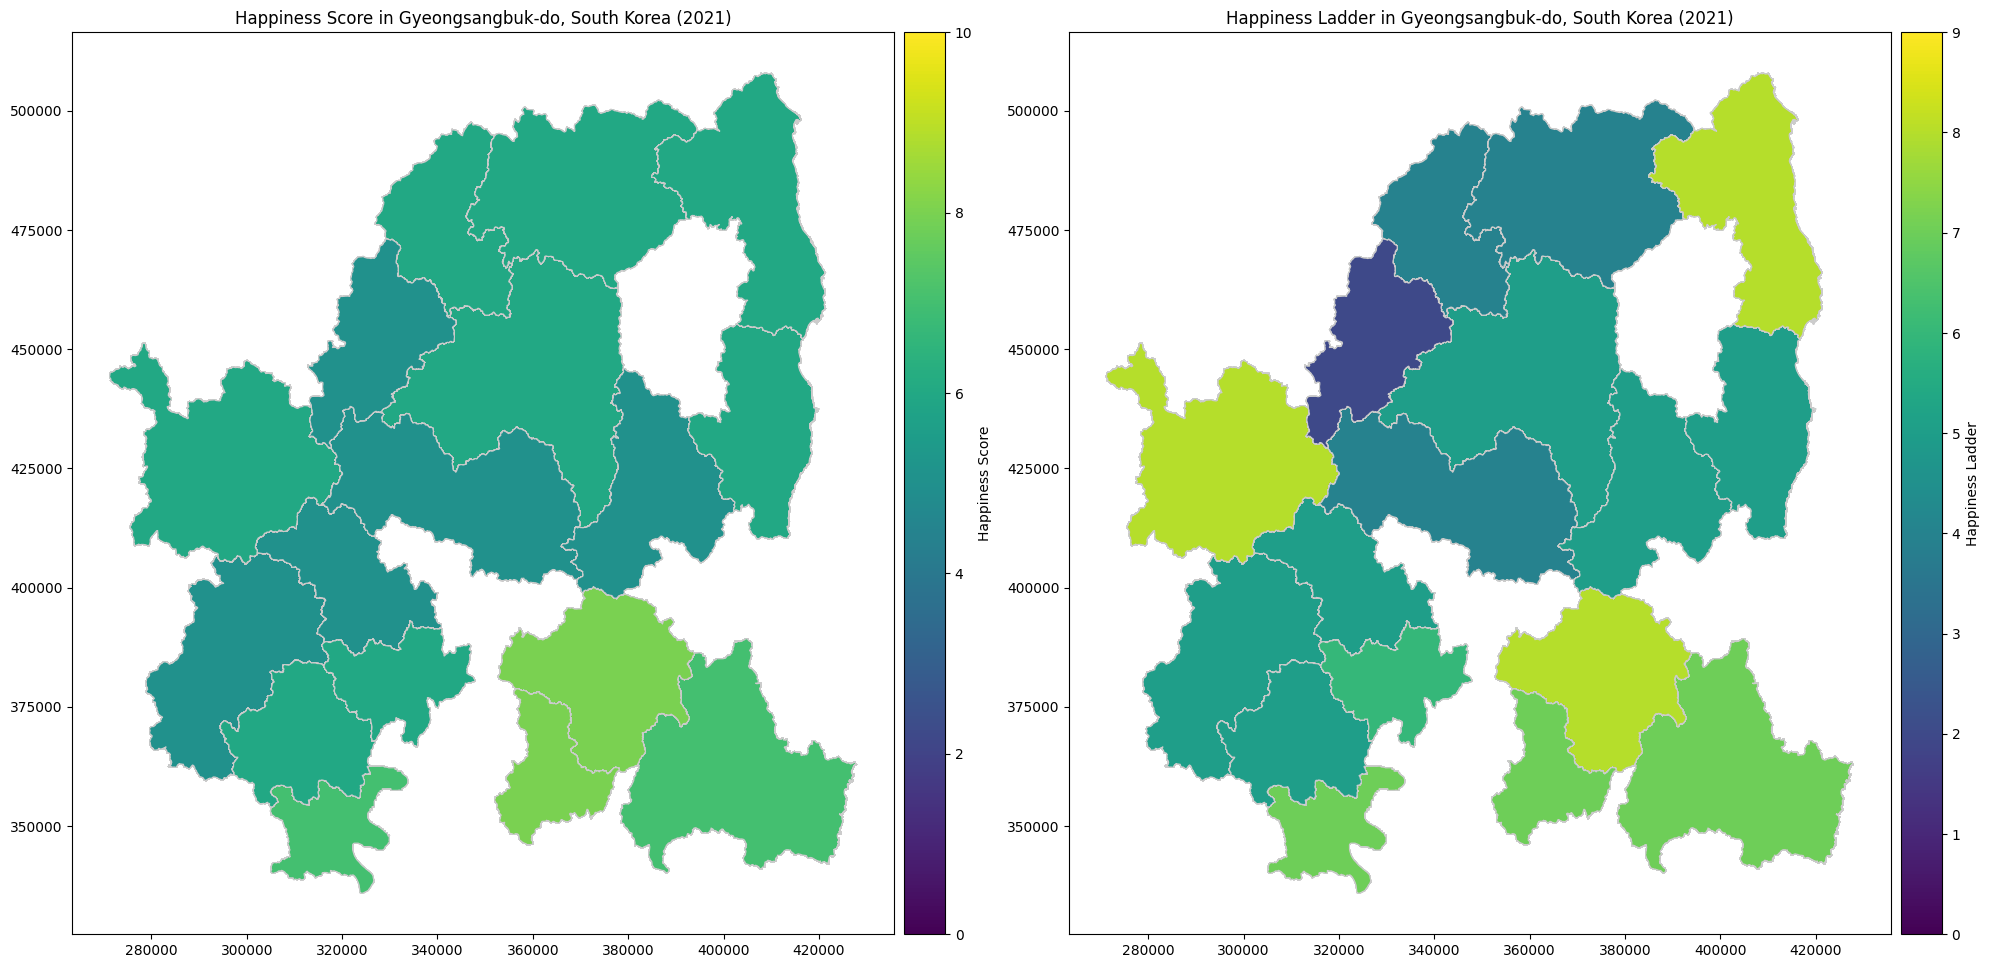

In [19]:
figure_making(map_gyeongbuk, "Gyeongsangbuk-do")

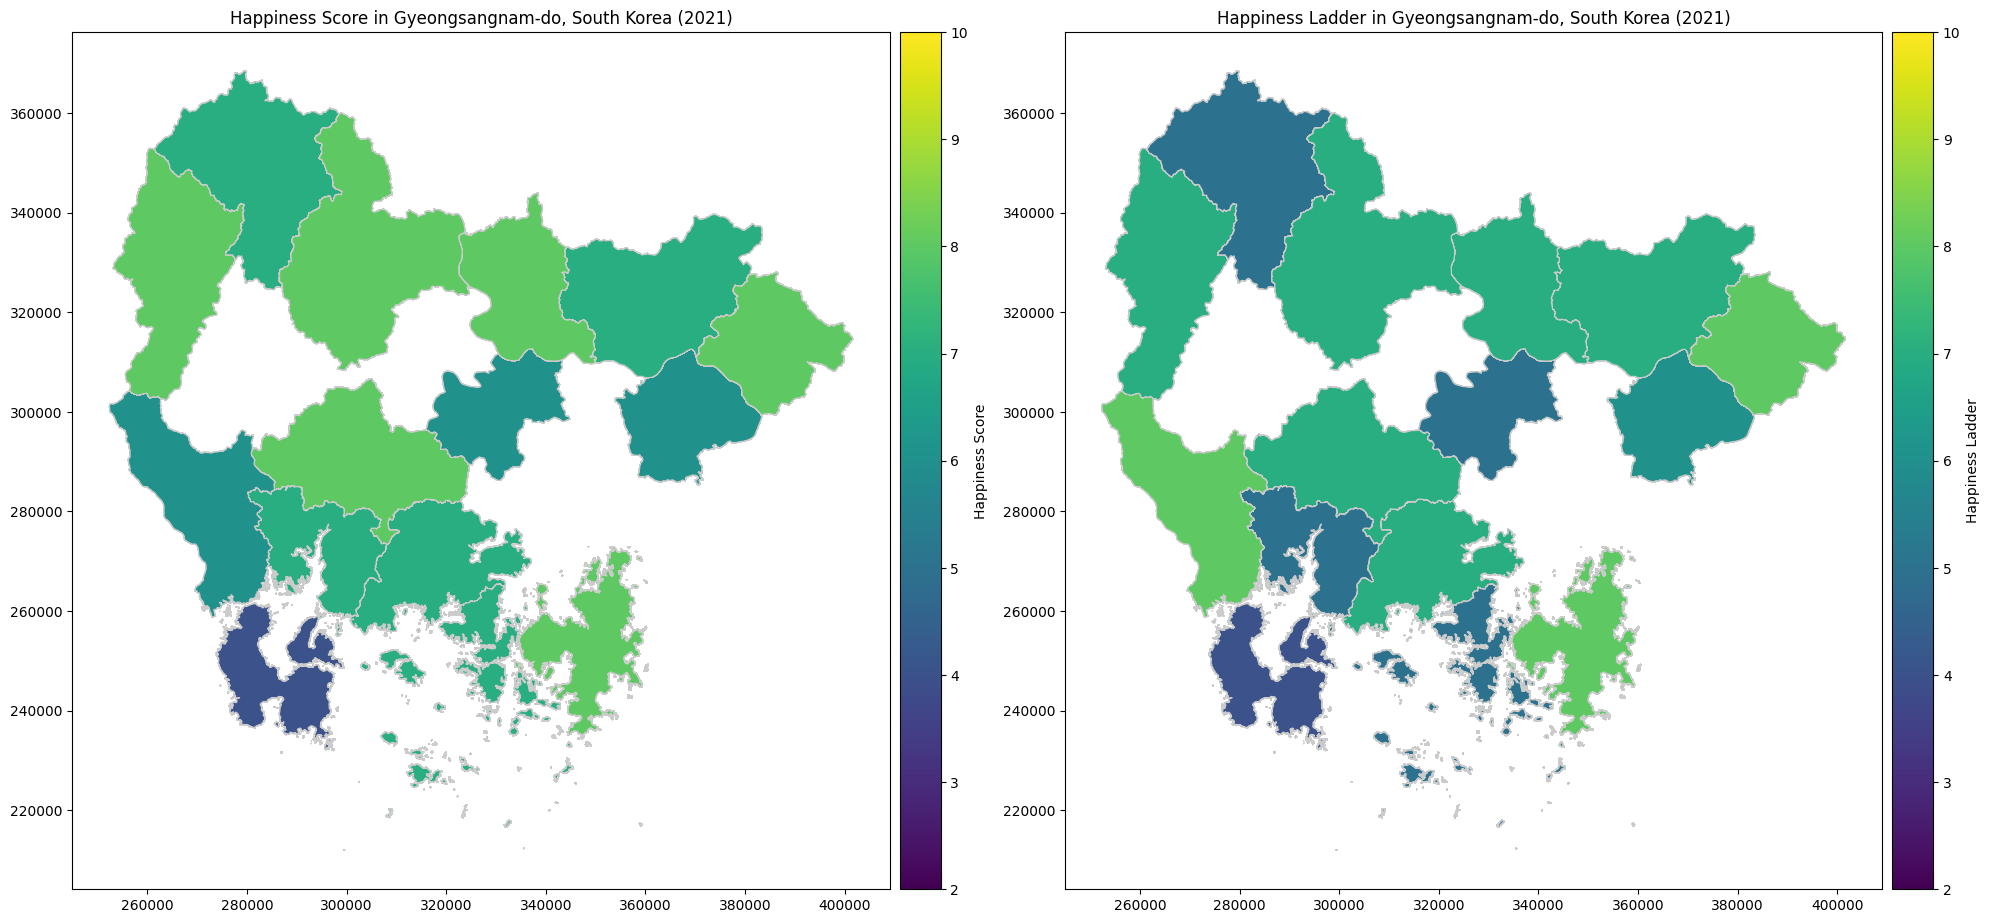

In [20]:
figure_making(map_gyeongnam, "Gyeongsangnam-do")

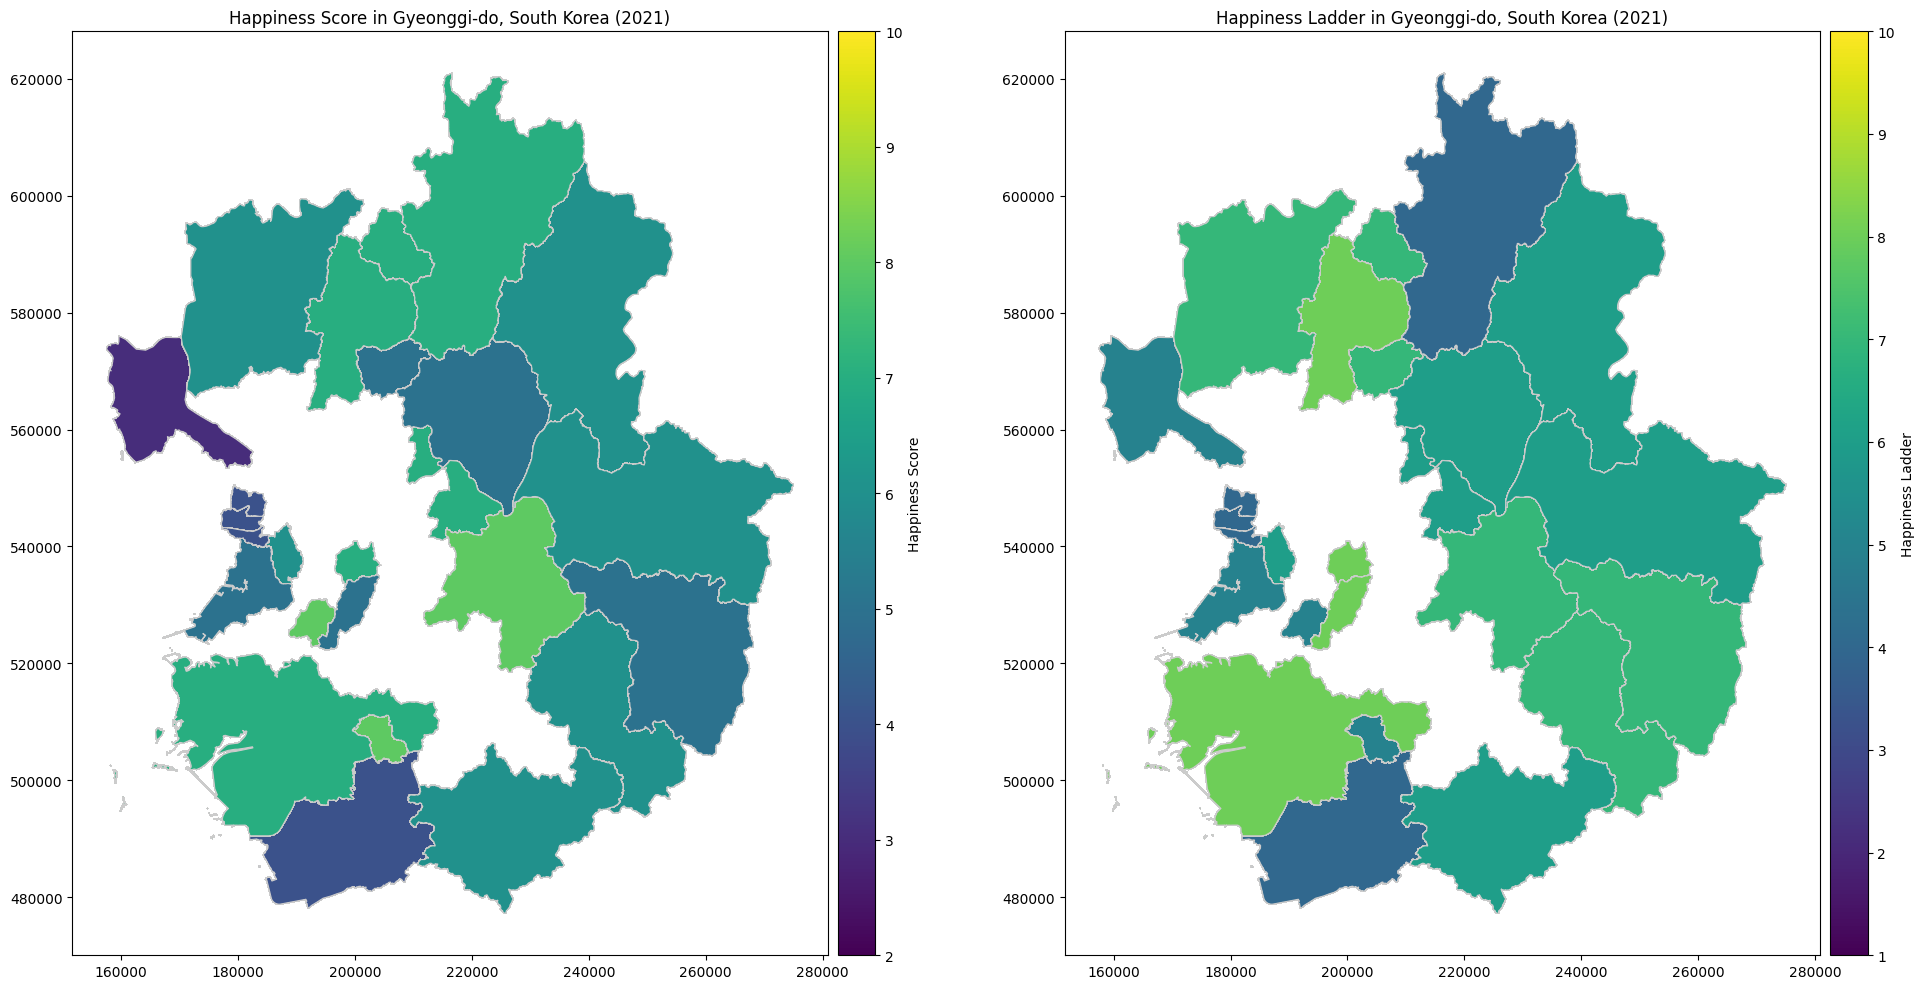

In [21]:
figure_making(map_gyeonggi, "Gyeonggi-do")

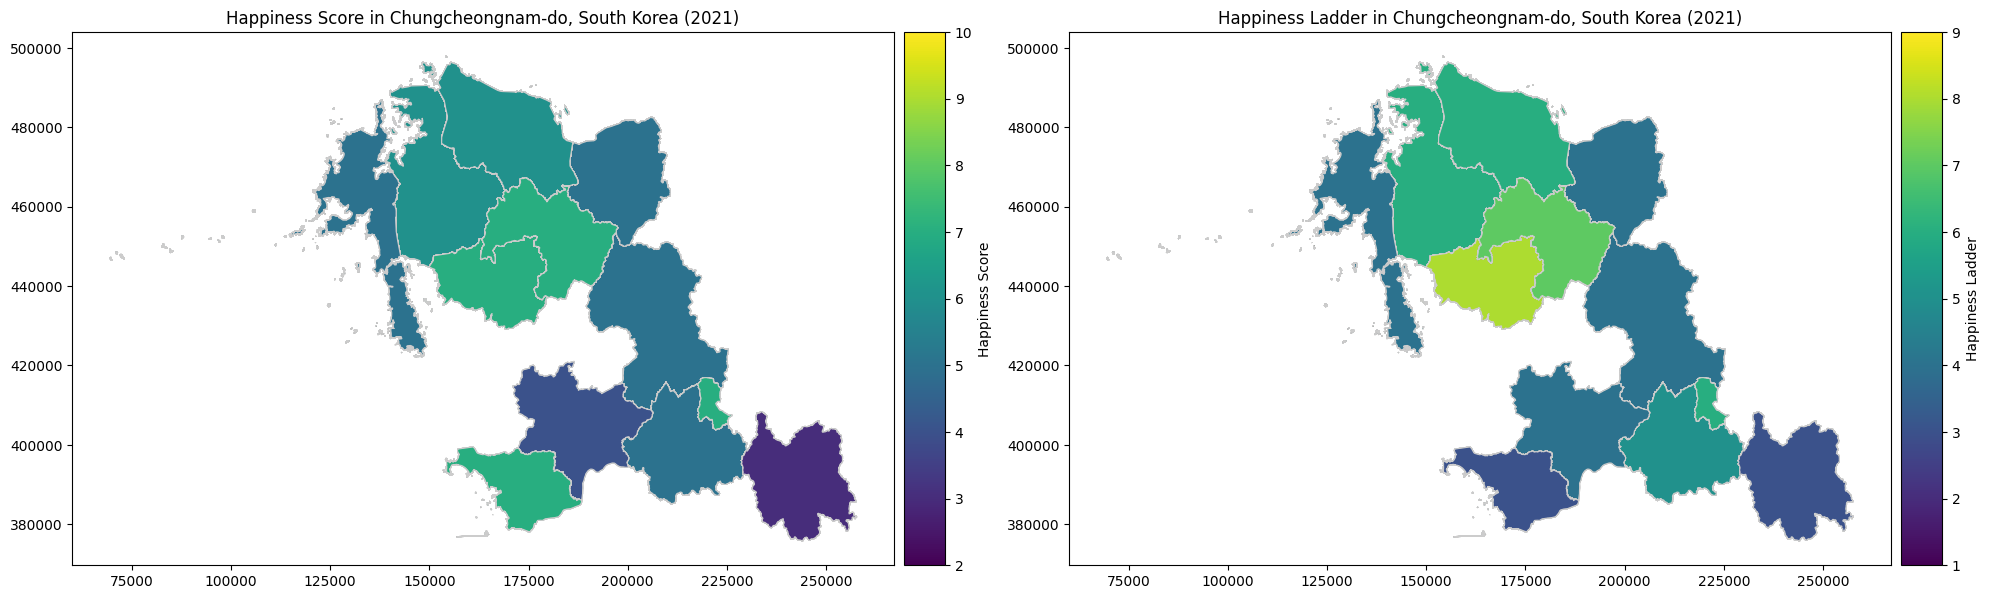

In [22]:
figure_making(map_chungnam, "Chungcheongnam-do")

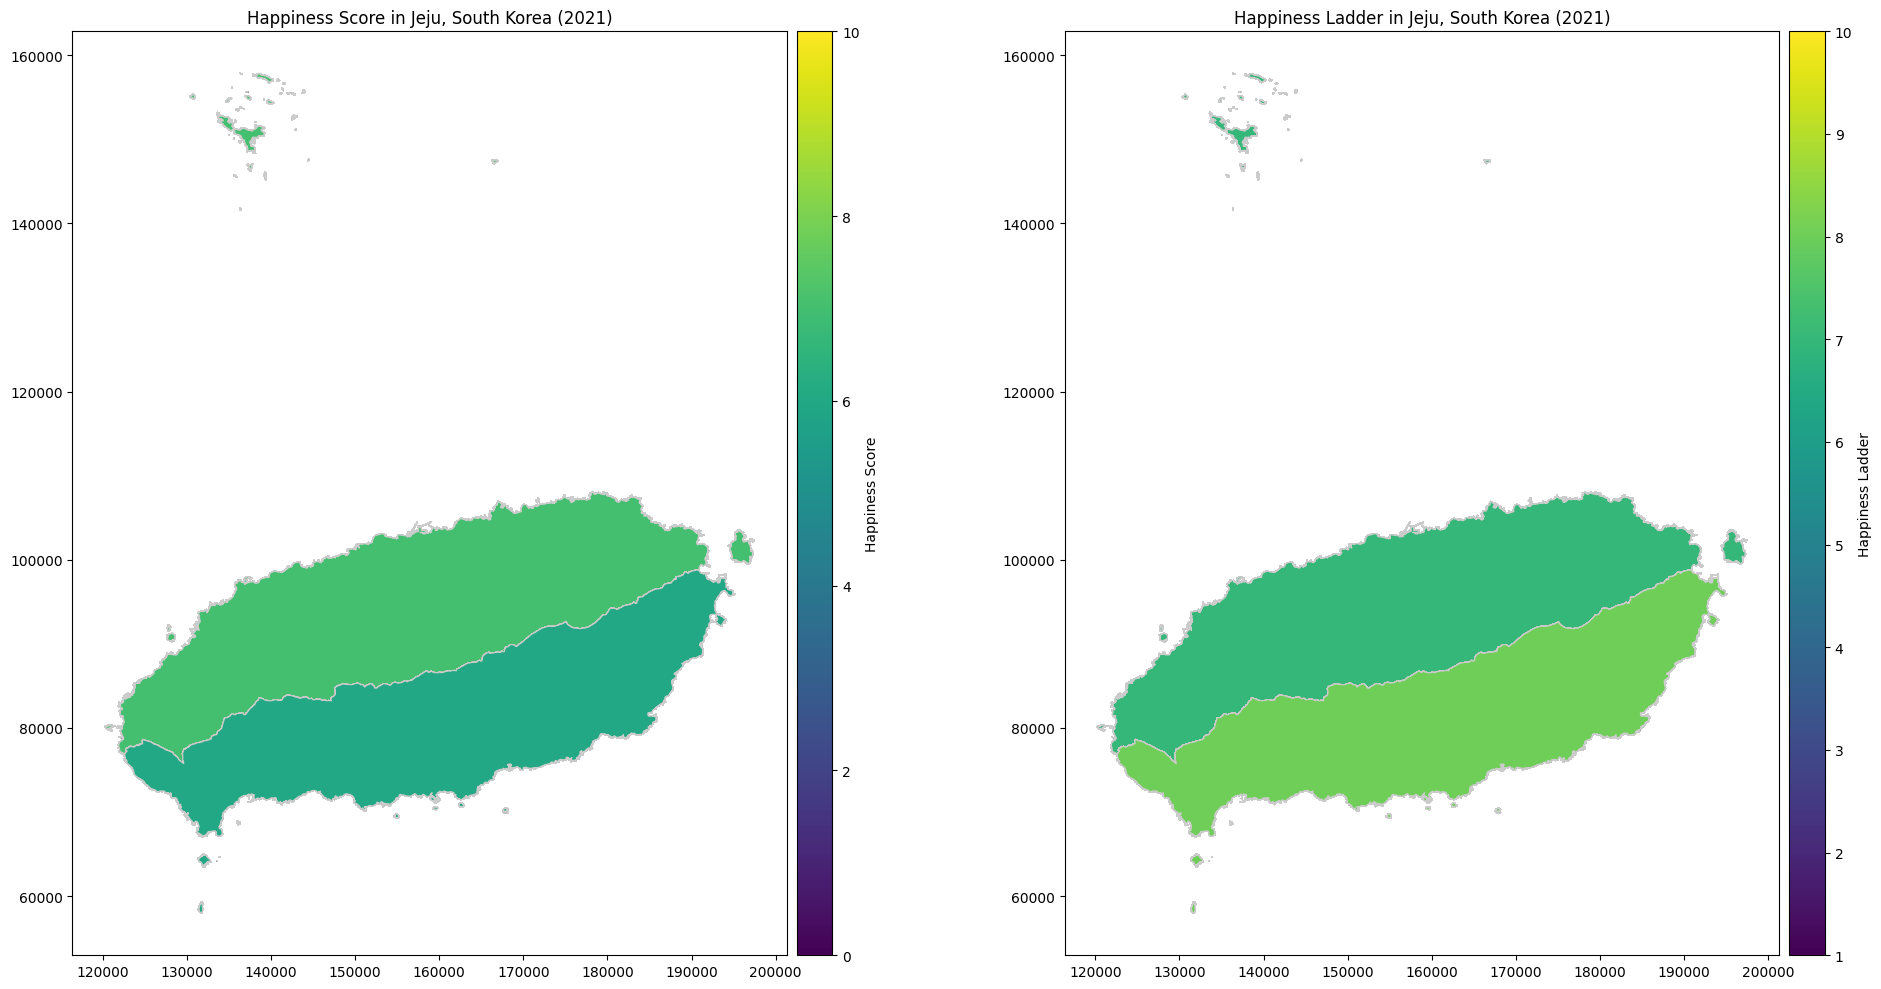

In [23]:
figure_making(map_jeju, "Jeju")

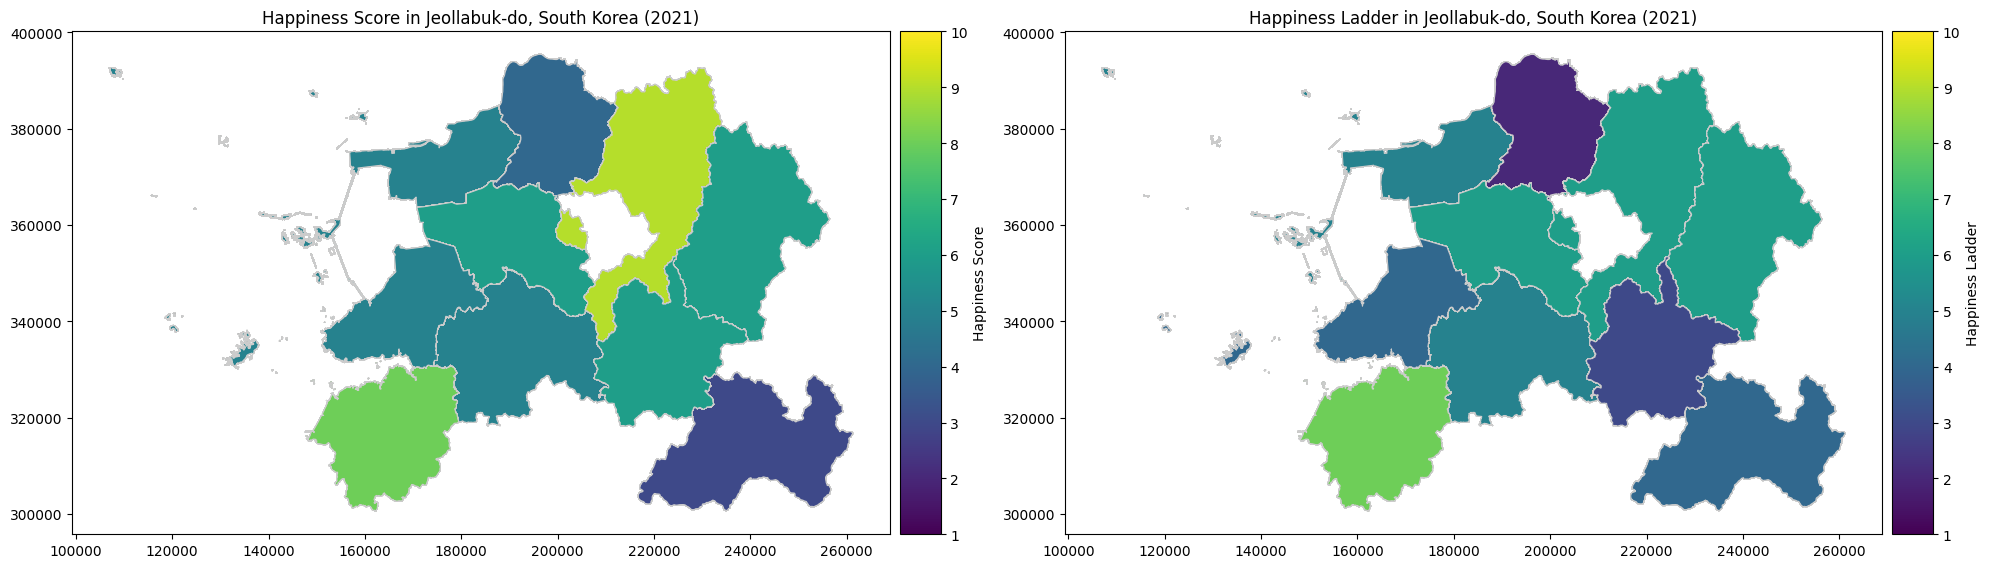

In [24]:
figure_making(map_jeonbuk, "Jeollabuk-do")

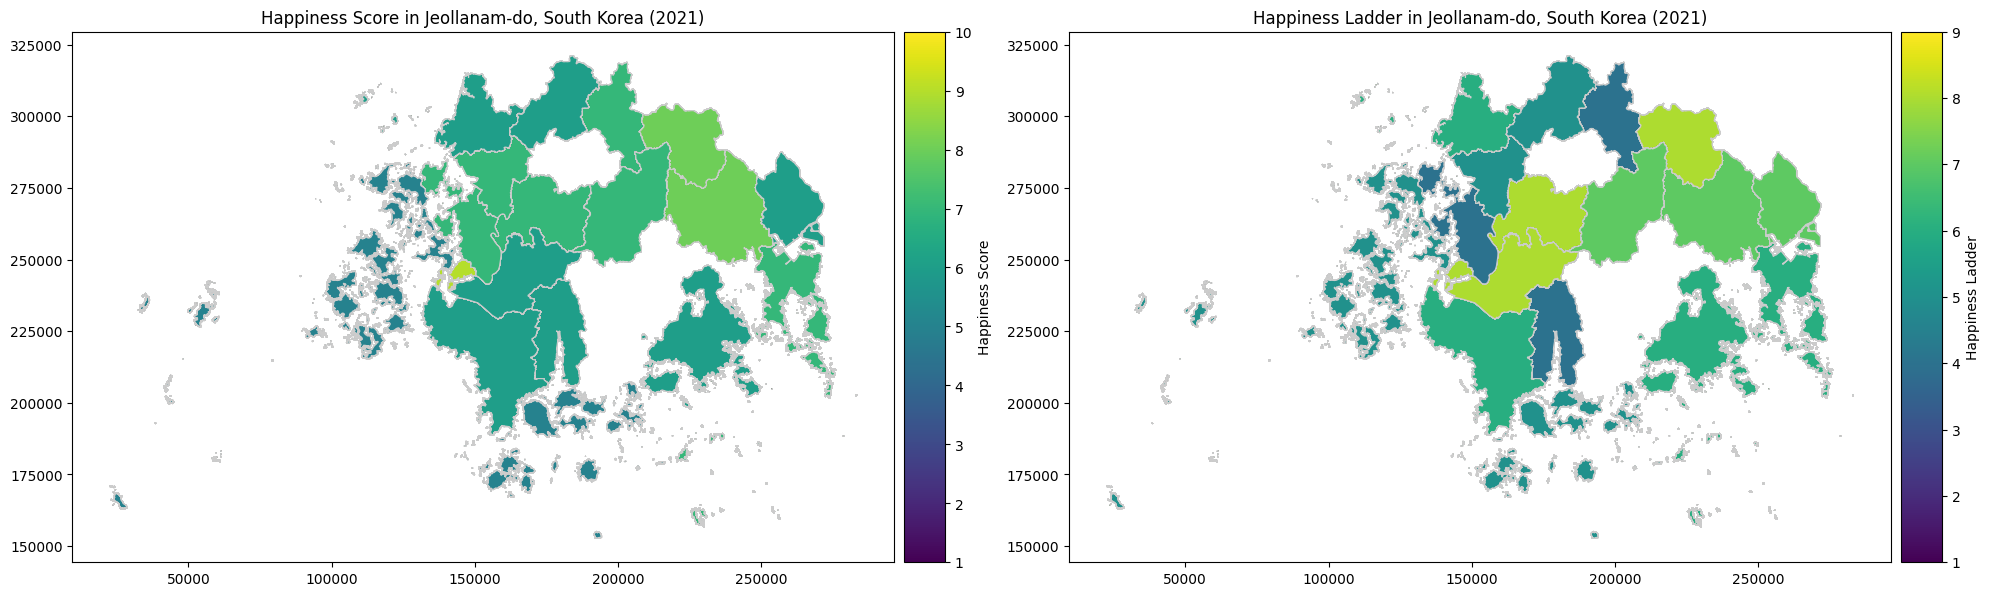

In [25]:
figure_making(map_jeonnam, "Jeollanam-do")

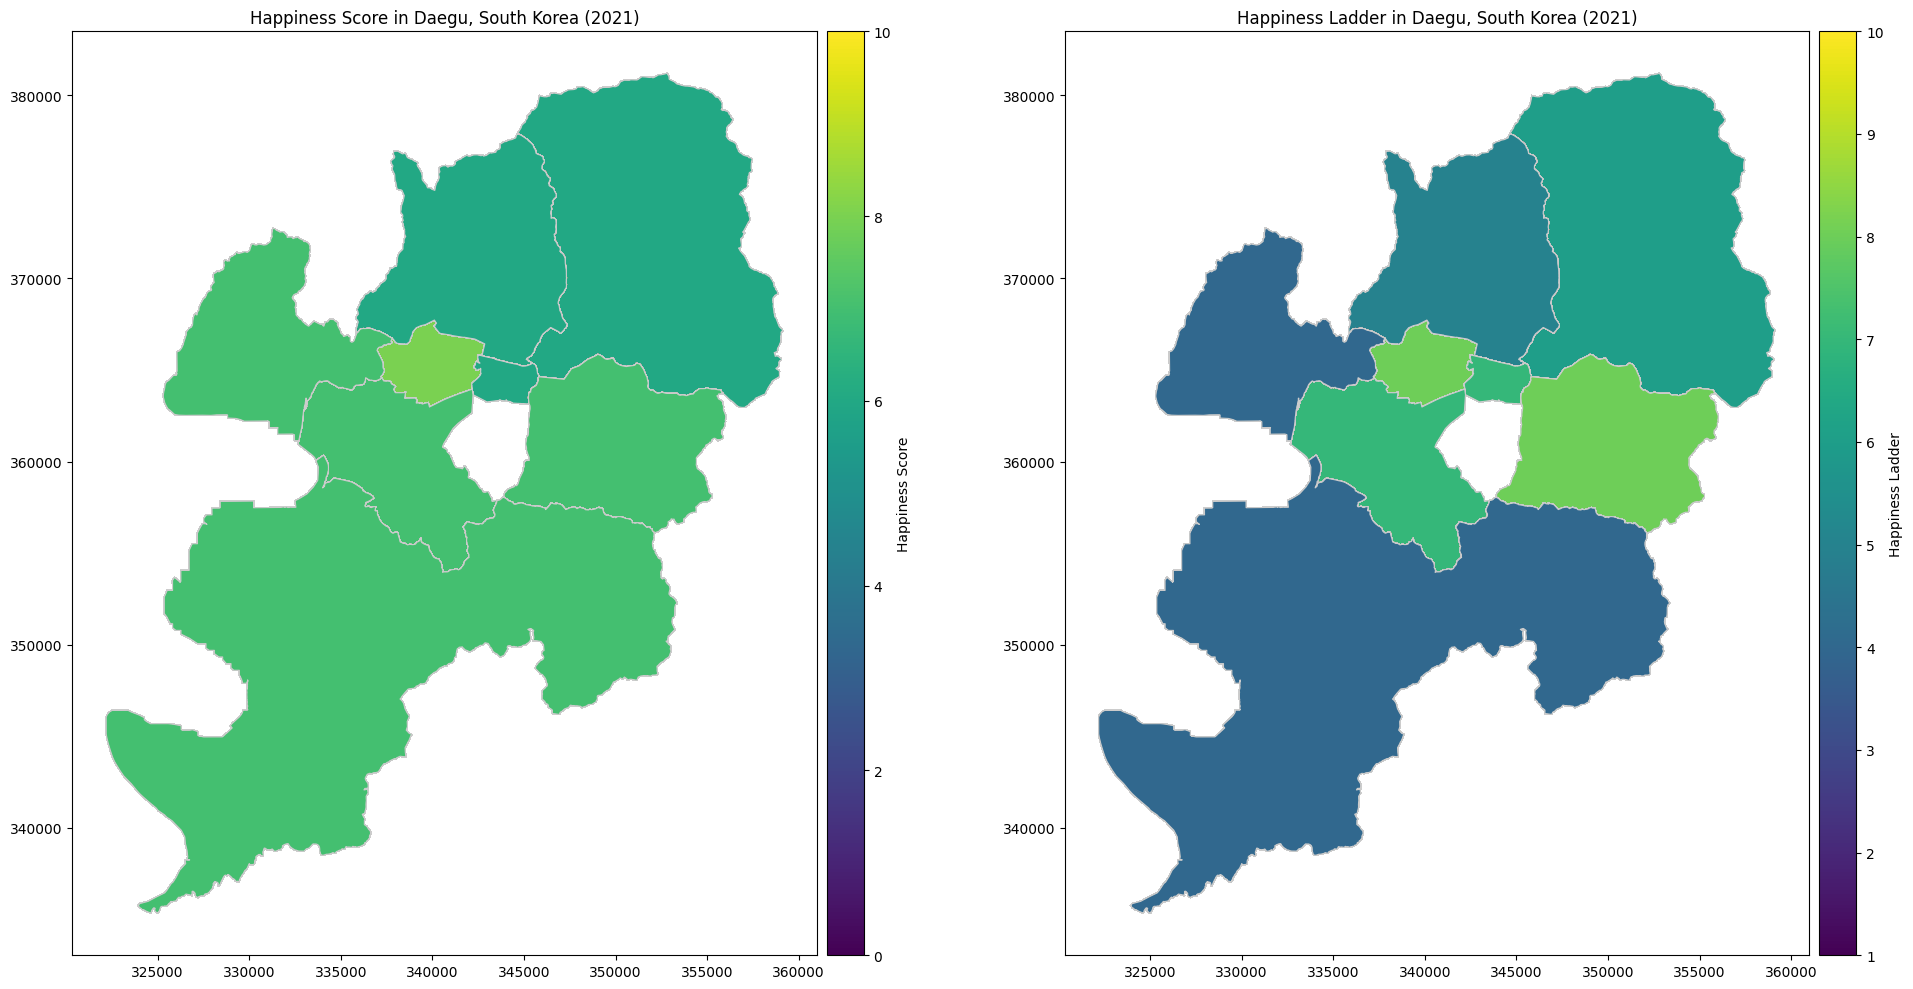

In [26]:
figure_making(map_daegu, "Daegu")

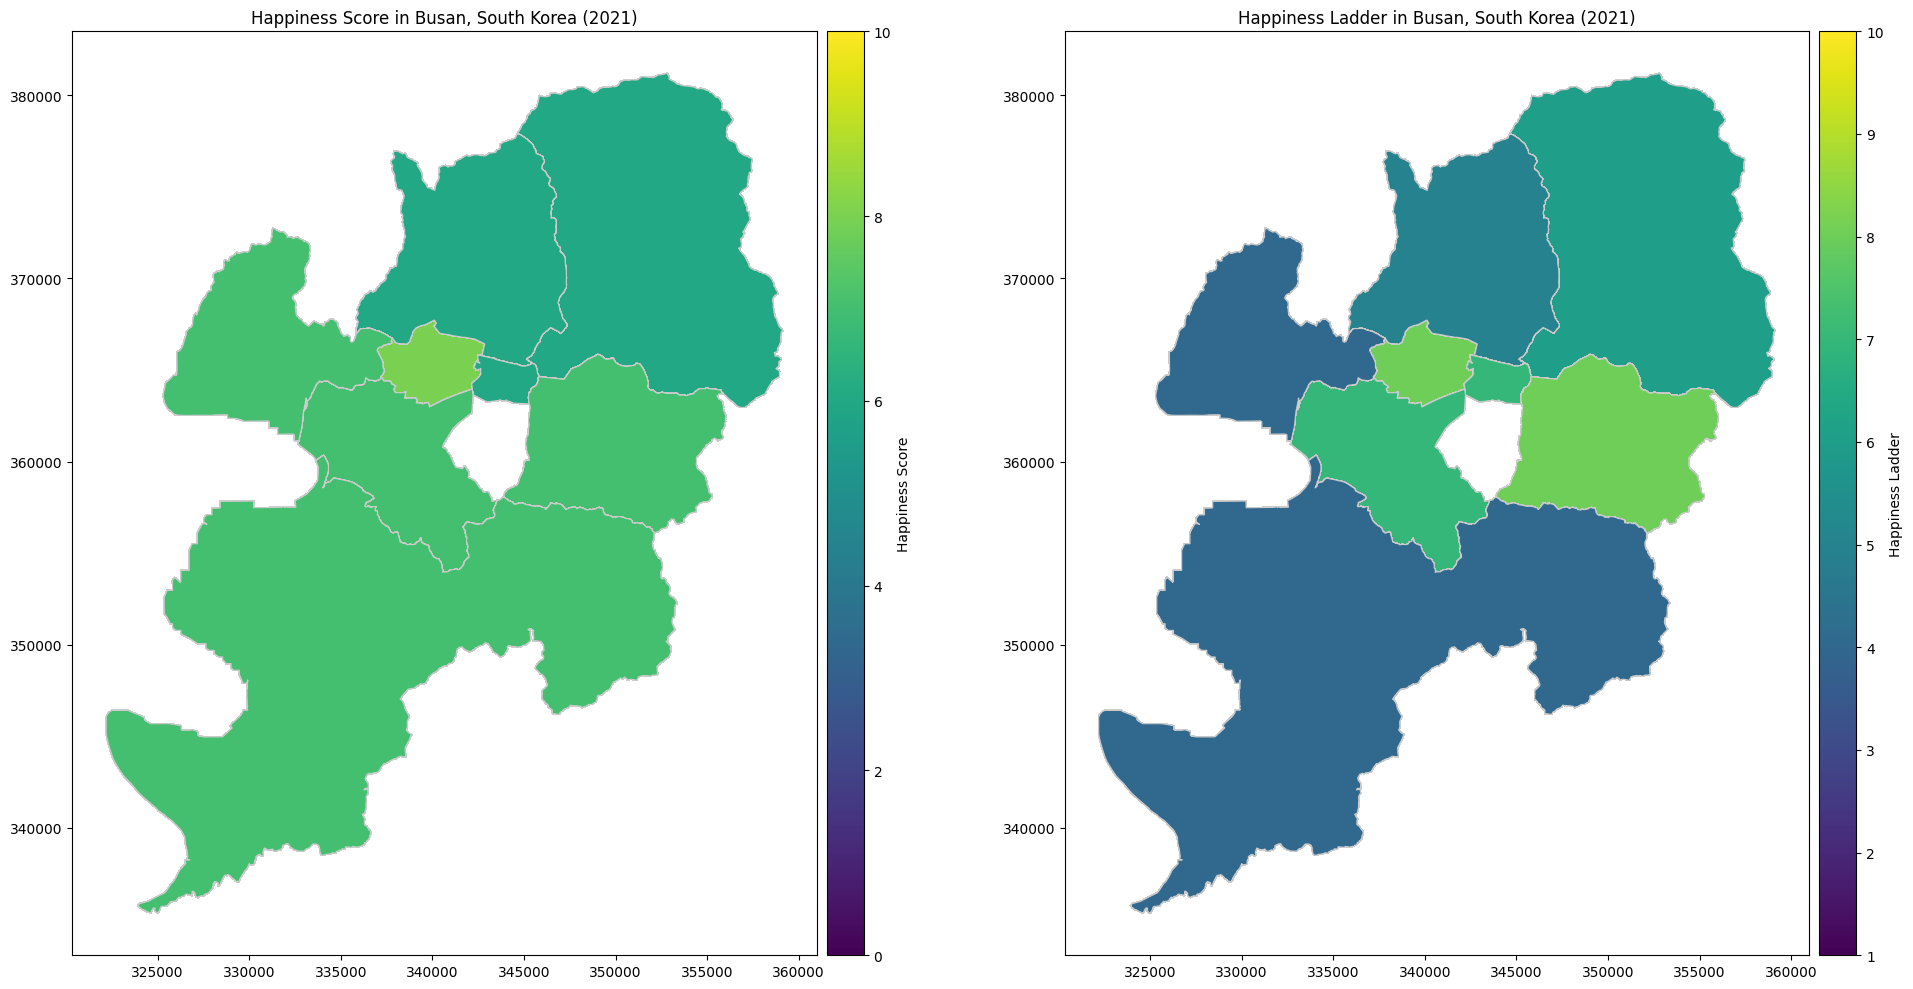

In [27]:
figure_making(map_daegu, "Busan")

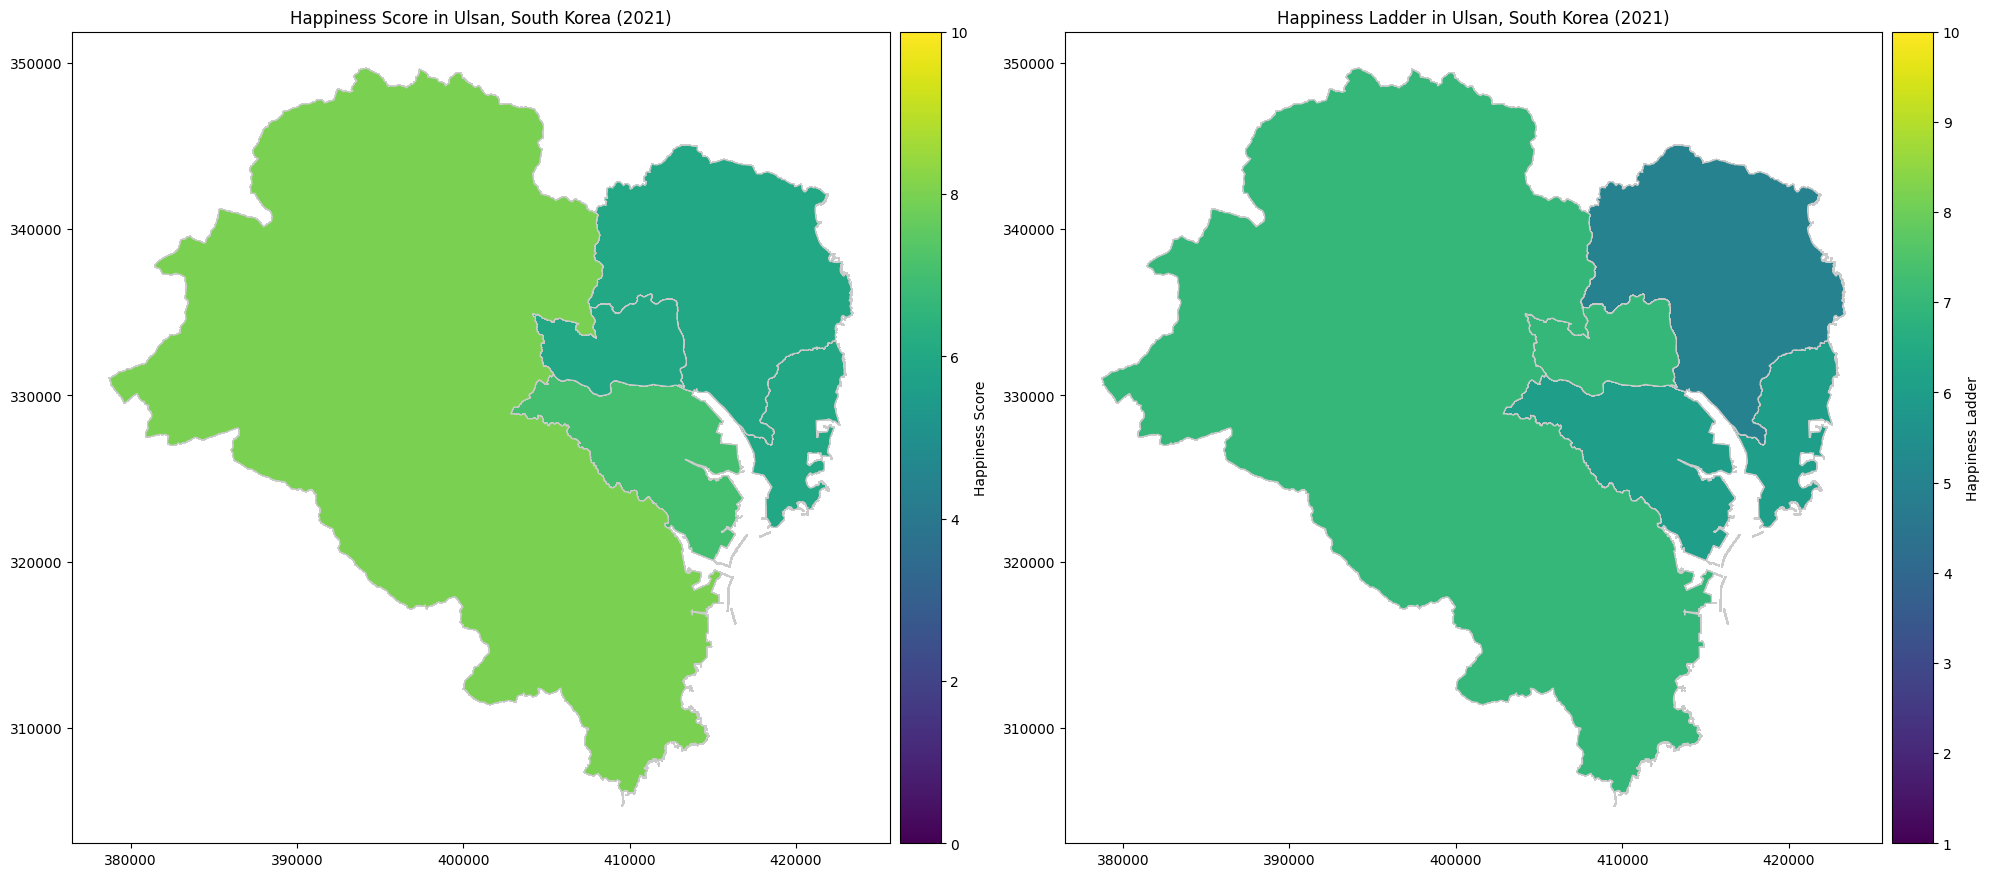

In [28]:
figure_making(map_ulsan, "Ulsan")

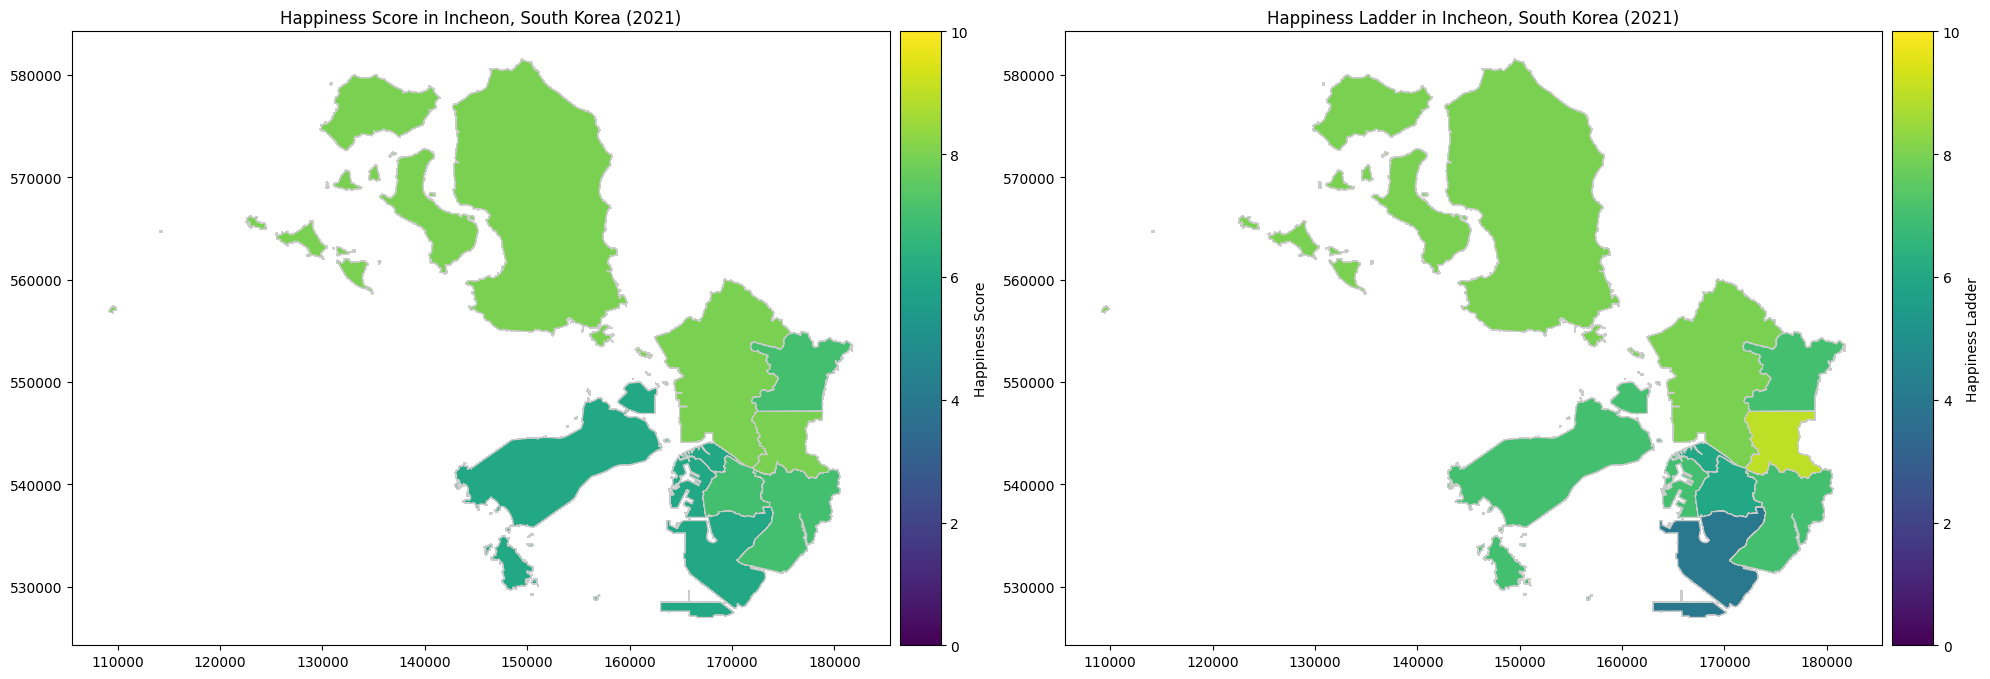

In [29]:
figure_making(map_incheon, "Incheon")

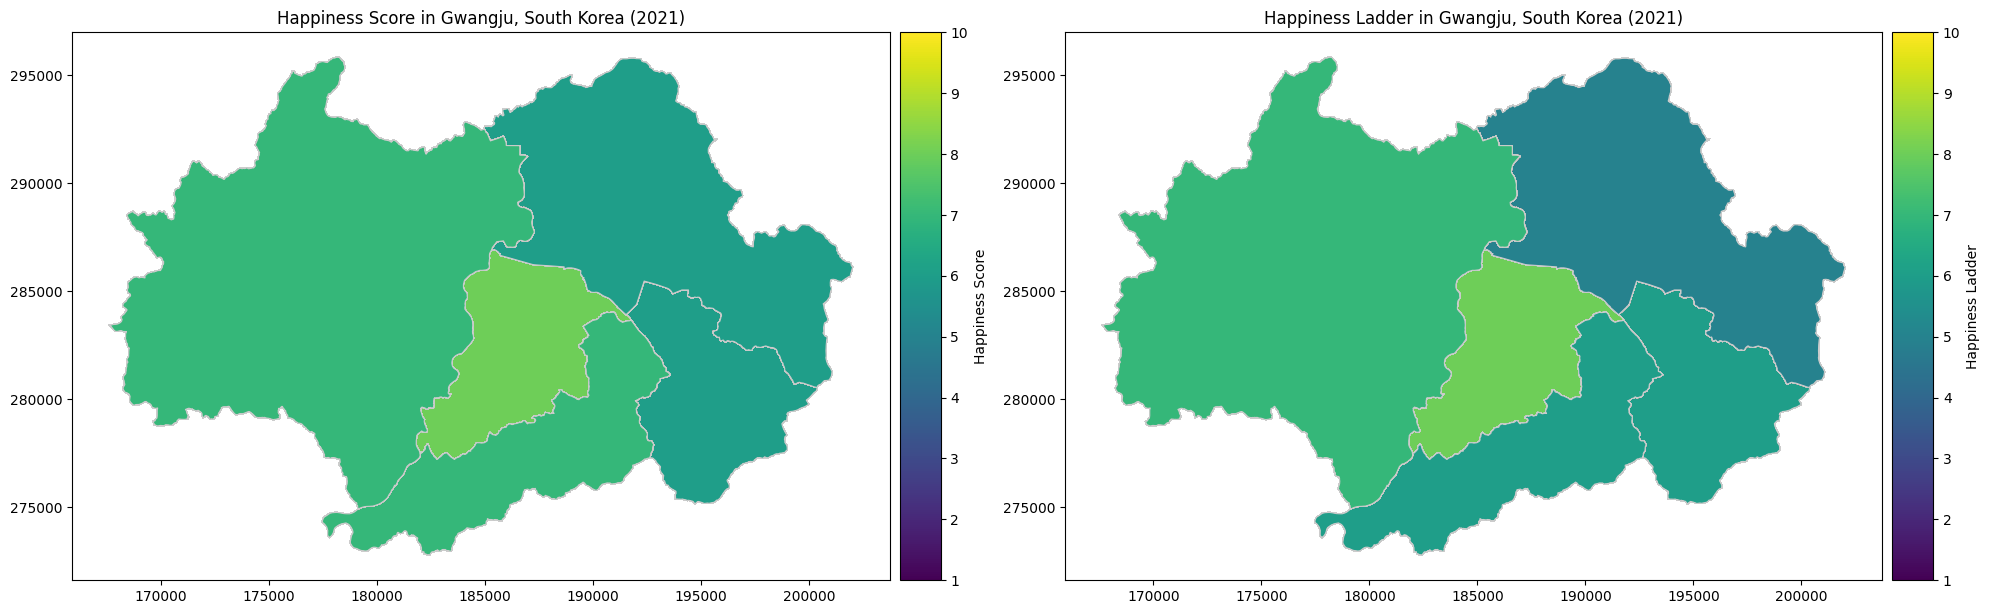

In [30]:
figure_making(map_gwangju, "Gwangju")

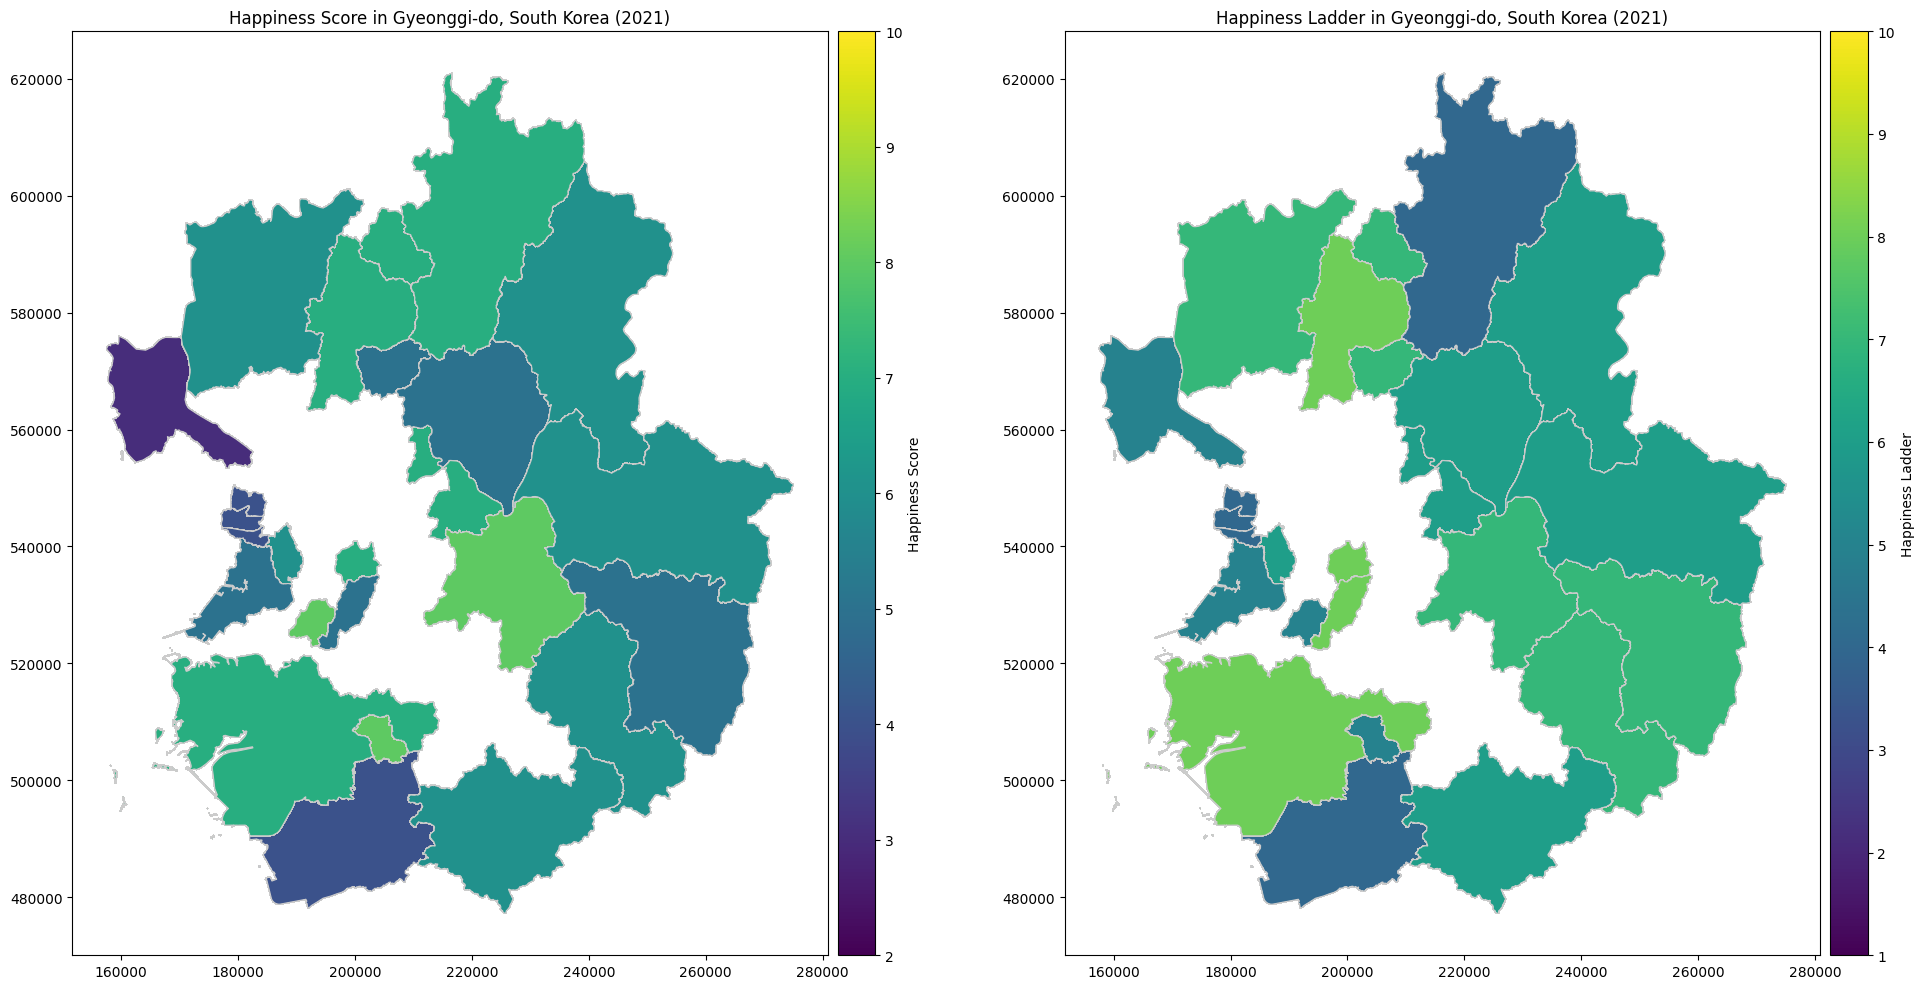

In [31]:
figure_making(map_gyeonggi, "Gyeonggi-do")

# Geospatial - Seoul

In [29]:
df_air

date   sido         gungu  TotalLivingPopulation    SO2   CO  \
0      2022-11-09  11000         Seoul           1.097881e+07  0.003  0.7   
1      2022-11-09  11110     Jongno-gu           3.355340e+05  0.003  0.8   
2      2022-11-09  11140       Jung-gu           3.496408e+05  0.003  0.7   
3      2022-11-09  11170    Yongsan-gu           3.081681e+05  0.003  0.6   
4      2022-11-09  11200  Seongdong-gu           3.693757e+05  0.003  0.6   
...           ...    ...           ...                    ...    ...  ...   
43337  2018-04-05  11620     Gwanak-gu           5.272641e+05  0.003  0.4   
43338  2018-04-05  11650     Seocho-gu           6.570409e+05  0.003  0.3   
43339  2018-04-05  11680    Gangnam-gu           9.128639e+05  0.005  0.4   
43340  2018-04-05  11710     Songpa-gu           7.733757e+05  0.004  0.4   
43341  2018-04-05  11740   Gangdong-gu           4.893388e+05  0.003  0.4   

       Ozone    NO2  PM10  PM2.5  
0      0.019  0.038  71.0   49.0  
1      0.019  0.040  72.0   52.0  
2      0.020  0.041  71.0   55.0  
3      0.020  0.035  65.0   45.0  
4      0.019  0.042  74.0   46.0  
...      ...    ...   ...    ...  
43337  0.021  0.028  11.0    8.0  
43338  0.020  0.023   9.0    5.0  
43339  0.012  0.034   3.0    3.0  
43340  0.027  0.016   7.0    5.0  
43341  0.022  0.019   7.0    5.0  

[43342 rows x 10 columns]

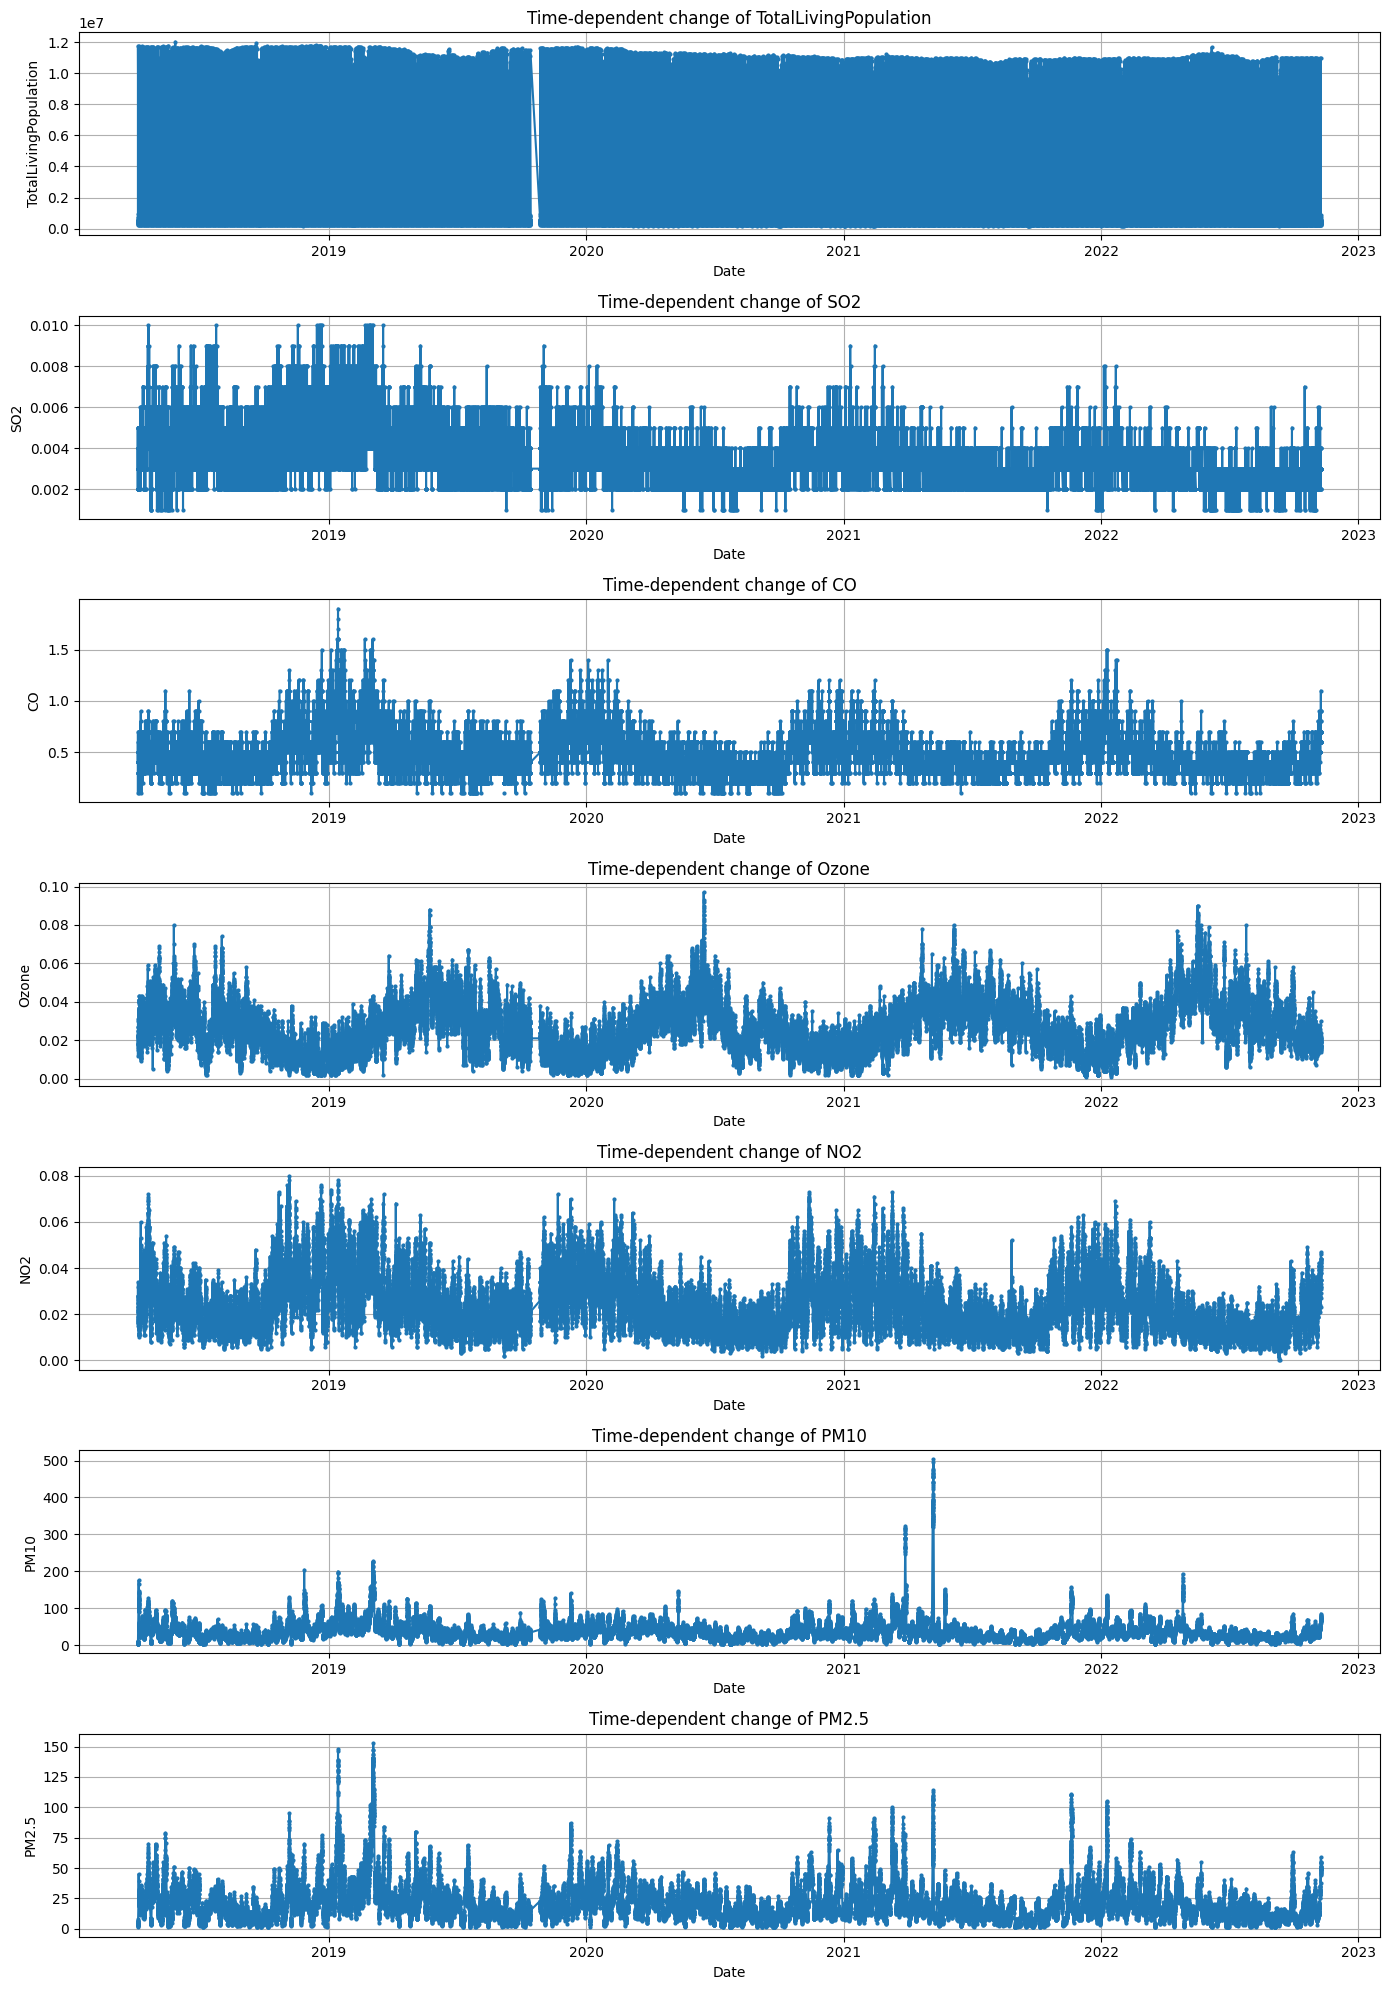

In [52]:
# Plot time-dependent changes
columns_to_plot = ['TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']

plt.figure(figsize=(14, 20))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.plot(df_air['date'], df_air[column], marker='o', markersize=2)
    plt.title(f'Time-dependent change of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

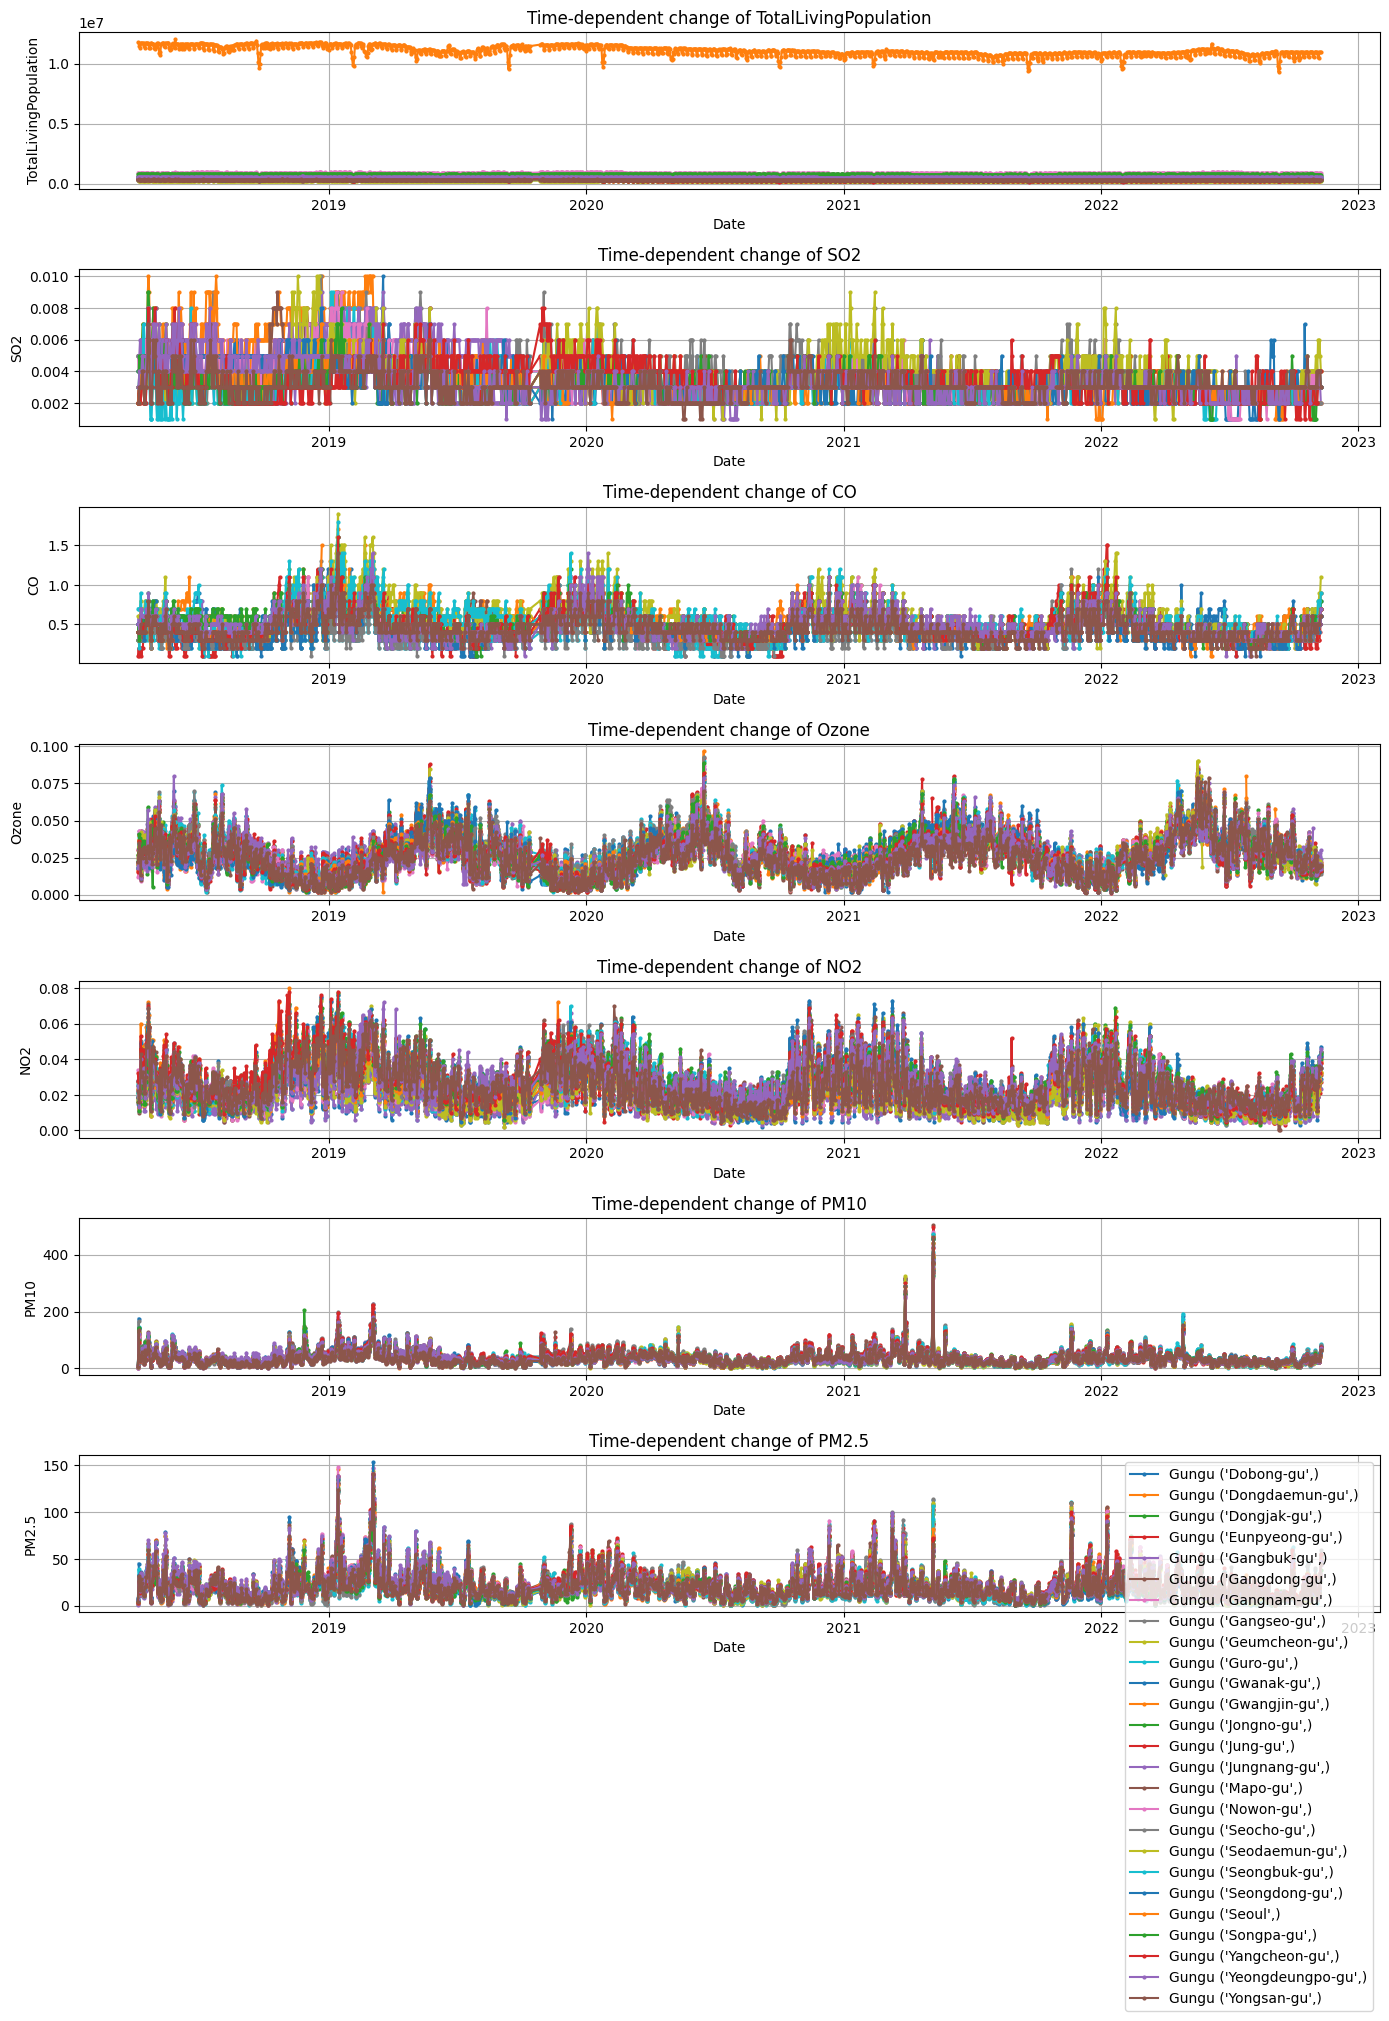

In [51]:
# Group by 'gungu' and 'date'
grouped = df_air.groupby(['gungu', 'date']).mean().reset_index()

# Plot time-dependent changes for each 'gungu'
columns_to_plot = ['TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']

plt.figure(figsize=(14, 20))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    for key, grp in grouped.groupby(['gungu']):
        plt.plot(grp['date'], grp[column], marker='o', label=f'Gungu {key}', markersize=2)
    plt.title(f'Time-dependent change of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# 2020 data

# Ensure the 'date' column is in datetime format
df_air['date'] = pd.to_datetime(df_air['date'])

# Extract the year from the 'date' column
df_air['year'] = df_air['date'].dt.year

# Subset the DataFrame to include only rows where the year is 2020
df_2020 = df_air[df_air['year'] == 2020]

# Drop the 'year' column if it's no longer needed
df_2020 = df_2020.drop(columns=['year'])

# Specify the columns to average
columns_to_average = ['TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']

# Group by 'gungu' and calculate the mean for the specified columns
averaged_air_2020 = df_2020.groupby('gungu')[columns_to_average].mean().reset_index()

In [32]:
# 2021 Data

# Ensure the 'date' column is in datetime format
df_air['date'] = pd.to_datetime(df_air['date'])

# Extract the year from the 'date' column
df_air['year'] = df_air['date'].dt.year

# Subset the DataFrame to include only rows where the year is 2021
df_2021 = df_air[df_air['year'] == 2021]

# Drop the 'year' column if it's no longer needed
df_2021 = df_2021.drop(columns=['year'])

# Specify the columns to average
columns_to_average = ['TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']

# Group by 'gungu' and calculate the mean for the specified columns
averaged_air_2021 = df_2021.groupby('gungu')[columns_to_average].mean().reset_index()

gungu  TotalLivingPopulation       SO2        CO     Ozone  \
0         Dobong-gu           2.784441e+05  0.002734  0.412034  0.029321   
1     Dongdaemun-gu           3.698922e+05  0.002858  0.451507  0.028592   
2        Dongjak-gu           3.934290e+05  0.002715  0.424932  0.027123   
3      Eunpyeong-gu           4.424226e+05  0.003140  0.496023  0.031316   
4        Gangbuk-gu           2.998956e+05  0.002564  0.398630  0.028792   
5       Gangdong-gu           5.133152e+05  0.002504  0.411507  0.024753   
6        Gangnam-gu           8.128438e+05  0.003395  0.448219  0.027416   
7        Gangseo-gu           5.522966e+05  0.003548  0.464384  0.028605   
8      Geumcheon-gu           2.377860e+05  0.003146  0.446832  0.027310   
9           Guro-gu           4.189496e+05  0.003252  0.406849  0.031027   
10        Gwanak-gu           4.928555e+05  0.003145  0.504945  0.028124   
11      Gwangjin-gu           3.774948e+05  0.003000  0.500826  0.026504   
12        Jongno-gu           2.852392e+05  0.003430  0.506301  0.029258   
13          Jung-gu           2.717421e+05  0.003348  0.475342  0.026351   
14      Jungnang-gu           3.581090e+05  0.002937  0.431768  0.028438   
15          Mapo-gu           4.634017e+05  0.002962  0.455890  0.026574   
16         Nowon-gu           5.143611e+05  0.002816  0.495616  0.027879   
17        Seocho-gu           5.727689e+05  0.003263  0.422466  0.027764   
18     Seodaemun-gu           3.766482e+05  0.004088  0.519890  0.029066   
19      Seongbuk-gu           4.335224e+05  0.002997  0.548175  0.026638   
20     Seongdong-gu           3.576604e+05  0.003175  0.450137  0.030041   
21            Seoul           1.076800e+07  0.003134  0.460822  0.027819   
22        Songpa-gu           7.525648e+05  0.003052  0.494795  0.027973   
23     Yangcheon-gu           3.910949e+05  0.003392  0.486301  0.026973   
24  Yeongdeungpo-gu           5.011599e+05  0.002940  0.513973  0.026200   
25       Yongsan-gu           3.001046e+05  0.003014  0.411364  0.023193   

         NO2       PM10      PM2.5  
0   0.016888  36.536986  18.290411  
1   0.024959  37.684932  19.686813  
2   0.024241  40.904110  20.901370  
3   0.017915  35.956164  20.126027  
4   0.016249  39.443836  19.126027  
5   0.022441  39.189041  20.769231  
6   0.023830  36.810959  19.997260  
7   0.025926  40.365385  21.134247  
8   0.025730  38.728767  21.715068  
9   0.023565  39.586301  19.578512  
10  0.027097  36.038356  18.594521  
11  0.020399  36.802740  19.509589  
12  0.023329  38.830137  20.416438  
13  0.026753  41.638356  20.665753  
14  0.022830  37.767123  18.249315  
15  0.027359  35.528767  18.967123  
16  0.022189  37.528767  20.821918  
17  0.025260  39.989041  19.980822  
18  0.017737  33.884615  19.857534  
19  0.025575  38.539726  17.690411  
20  0.027189  37.536986  19.021978  
21  0.023512  38.065753  19.761644  
22  0.026948  37.339726  19.076712  
23  0.025592  40.661157  21.180822  
24  0.026767  37.273973  20.621918  
25  0.022341  37.212034  19.079545

In [44]:
# 2022 data

# Ensure the 'date' column is in datetime format
df_air['date'] = pd.to_datetime(df_air['date'])

# Extract the year from the 'date' column
df_air['year'] = df_air['date'].dt.year

# Subset the DataFrame to include only rows where the year is 2022
df_2022 = df_air[df_air['year'] == 2022]

# Drop the 'year' column if it's no longer needed
df_2022 = df_2022.drop(columns=['year'])

# Specify the columns to average
columns_to_average = ['TotalLivingPopulation', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']

# Group by 'gungu' and calculate the mean for the specified columns
averaged_air_2022 = df_2022.groupby('gungu')[columns_to_average].mean().reset_index()

In [106]:
# Economic data

df_gdp_sub = df_gdp.copy()
seoul_gdp = df_gdp_sub[["gungu", "Gross Regional Domestic Product (Current Price) (Million Won)"]]
seoul_gdp.rename(columns={"Gross Regional Domestic Product (Current Price) (Million Won)": "GDP"}, inplace=True)

<ipython-input-106-19030d8c6e09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_gdp.rename(columns={"Gross Regional Domestic Product (Current Price) (Million Won)": "GDP"}, inplace=True)


In [143]:
# Social data

seoul_social = df_social.copy()
seoul_social.rename(columns={"Housing_Type_English": "housing", "Average_Number_Of_Households":"avg_households"}, inplace=True)
seoul_social

gungu                       housing  avg_households
0     Dobong-gu                          Free       11.250000
1     Dobong-gu                         Lease      712.916667
2     Dobong-gu                 Monthly lease        1.000000
3     Dobong-gu     Monthly rent with deposit     3056.416667
4     Dobong-gu  Monthly rent without deposit      494.333333
..          ...                           ...             ...
143  Yongsan-gu                         Lease      436.666667
144  Yongsan-gu                 Monthly lease        3.666667
145  Yongsan-gu     Monthly rent with deposit     2157.416667
146  Yongsan-gu  Monthly rent without deposit     1401.750000
147  Yongsan-gu                     Own house       13.166667

[148 rows x 3 columns]

In [144]:
seoul_gdp_air = pd.merge(seoul_gdp, averaged_air_2021, left_on='gungu', right_on='gungu')
seoul_2021 = pd.merge(seoul_gdp_air, seoul_social, left_on='gungu', right_on='gungu')
seoul_2021

gungu       GDP  TotalLivingPopulation       SO2        CO  \
0      Jongno-gu  35719537          285239.204593  0.003430  0.506301   
1      Jongno-gu  35719537          285239.204593  0.003430  0.506301   
2      Jongno-gu  35719537          285239.204593  0.003430  0.506301   
3      Jongno-gu  35719537          285239.204593  0.003430  0.506301   
4      Jongno-gu  35719537          285239.204593  0.003430  0.506301   
..           ...       ...                    ...       ...       ...   
143  Gangdong-gu   9364063          513315.209157  0.002504  0.411507   
144  Gangdong-gu   9364063          513315.209157  0.002504  0.411507   
145  Gangdong-gu   9364063          513315.209157  0.002504  0.411507   
146  Gangdong-gu   9364063          513315.209157  0.002504  0.411507   
147  Gangdong-gu   9364063          513315.209157  0.002504  0.411507   

        Ozone       NO2       PM10      PM2.5                       housing  \
0    0.029258  0.023329  38.830137  20.416438                          Free   
1    0.029258  0.023329  38.830137  20.416438                         Lease   
2    0.029258  0.023329  38.830137  20.416438                 Monthly lease   
3    0.029258  0.023329  38.830137  20.416438     Monthly rent with deposit   
4    0.029258  0.023329  38.830137  20.416438  Monthly rent without deposit   
..        ...       ...        ...        ...                           ...   
143  0.024753  0.022441  39.189041  20.769231                         Lease   
144  0.024753  0.022441  39.189041  20.769231                 Monthly lease   
145  0.024753  0.022441  39.189041  20.769231     Monthly rent with deposit   
146  0.024753  0.022441  39.189041  20.769231  Monthly rent without deposit   
147  0.024753  0.022441  39.189041  20.769231                     Own house   

     avg_households  
0          5.833333  
1        146.416667  
2          2.083333  
3       1137.750000  
4       1297.083333  
..              ...  
143      602.083333  
144        1.000000  
145     3189.250000  
146     1006.750000  
147       29.833333  

[148 rows x 11 columns]

In [145]:
map_seoul

ADM_SECT_C     SGG_NM  SGG_OID COL_ADM_SE SGG_NM_si   SGG_NM_gug  \
14693      11140   서울특별시 중구     34.0      11140     Seoul      Jung-gu   
14694      11140   서울특별시 중구     34.0      11140     Seoul      Jung-gu   
14695      11140   서울특별시 중구     34.0      11140     Seoul      Jung-gu   
14696      11140   서울특별시 중구     34.0      11140     Seoul      Jung-gu   
14697      11140   서울특별시 중구     34.0      11140     Seoul      Jung-gu   
...          ...        ...      ...        ...       ...          ...   
20545      11740  서울특별시 강동구      1.0      11740     Seoul  Gangdong-gu   
20546      11740  서울특별시 강동구      1.0      11740     Seoul  Gangdong-gu   
20547      11740  서울특별시 강동구      1.0      11740     Seoul  Gangdong-gu   
20548      11740  서울특별시 강동구      1.0      11740     Seoul  Gangdong-gu   
20549      11740  서울특별시 강동구      1.0      11740     Seoul  Gangdong-gu   

      COL_ADM__1 COL_ADM__2  \
14693         11        140   
14694         11        140   
14695         11        140   
14696         11        140   
14697         11        140   
...          ...        ...   
20545         11        740   
20546         11        740   
20547         11        740   
20548         11        740   
20549         11        740   

                                                geometry  sido_cd  ...  \
14693  POLYGON ((202072.448 552243.432, 202072.646 55...     26.0  ...   
14694  POLYGON ((202072.448 552243.432, 202072.646 55...     26.0  ...   
14695  POLYGON ((202072.448 552243.432, 202072.646 55...     26.0  ...   
14696  POLYGON ((202072.448 552243.432, 202072.646 55...     26.0  ...   
14697  POLYGON ((202072.448 552243.432, 202072.646 55...     26.0  ...   
...                                                  ...      ...  ...   
20545  POLYGON ((215841.933 552101.057, 215843.046 55...     11.0  ...   
20546  POLYGON ((215841.933 552101.057, 215843.046 55...     11.0  ...   
20547  POLYGON ((215841.933 552101.057, 215843.046 55...     11.0  ...   
20548  POLYGON ((215841.933 552101.057, 215843.046 55...     11.0  ...   
20549  POLYGON ((215841.933 552101.057, 215843.046 55...     11.0  ...   

      marriage_4.0  marriage_5.0 housing_1.0 housing_2.0 housing_3.0  \
14693          0.0           0.0         0.0         0.0         1.0   
14694          0.0           0.0         0.0         0.0         1.0   
14695          0.0           0.0         1.0         0.0         0.0   
14696          0.0           0.0         1.0         0.0         0.0   
14697          0.0           0.0         1.0         0.0         0.0   
...            ...           ...         ...         ...         ...   
20545          0.0           0.0         0.0         1.0         0.0   
20546          0.0           0.0         1.0         0.0         0.0   
20547          0.0           0.0         1.0         0.0         0.0   
20548          0.0           0.0         1.0         0.0         0.0   
20549          0.0           0.0         1.0         0.0         0.0   

      housing_4.0  housing_5.0  housing_6.0     gugun_gu  gugun_si  
14693         0.0          0.0          0.0      Jung-gu      None  
14694         0.0          0.0          0.0      Jung-gu      None  
14695         0.0          0.0          0.0      Jung-gu      None  
14696         0.0          0.0          0.0      Jung-gu      None  
14697         0.0          0.0          0.0      Jung-gu      None  
...           ...          ...          ...          ...       ...  
20545         0.0          0.0          0.0  Gangdong-gu      None  
20546         0.0          0.0          0.0  Gangdong-gu      None  
20547         0.0          0.0          0.0  Gangdong-gu      None  
20548         0.0          0.0          0.0  Gangdong-gu      None  
20549         0.0          0.0          0.0  Gangdong-gu      None  

[3601 rows x 198 columns]

Merge it with 2021 air quality data, since the map_seoul is based on 2021 happiness data.

In [146]:
# Merge the DataFrames based on the common column
ses_map2021 = map_seoul.merge(seoul_2021, left_on='SGG_NM_gug', right_on='gungu', how="outer")

# Convert the merged DataFrame to a GeoDataFrame if it's not already
ses_map2021 = gp.GeoDataFrame(ses_map2021, geometry='geometry')

print(ses_map2021.columns.tolist())

['ADM_SECT_C', 'SGG_NM', 'SGG_OID', 'COL_ADM_SE', 'SGG_NM_si', 'SGG_NM_gug', 'COL_ADM__1', 'COL_ADM__2', 'geometry', 'sido_cd', 'sido', 'gugun_cd', 'gugun', 'strata1', 'strata2', 'strata3', 'strata_cd', 'age', 'happiness_score', 'a2_1', 'a2_2', 'a2_3', 'a3_1', 'a3_2', 'a3_3', 'a3_4', 'a3_5', 'b1_1', 'b1_2', 'b1_3', 'b1_4', 'b1_5', 'b1_6', 'b1_7', 'b1_8', 'b1_9', 'b1_10', 'b2', 'b3', 'happiness_ladder', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7_1', 'c7_2', 'c7_3', 'c7_4', 'c7_5', 'c7_6', 'c7_7', 'c7_8', 'c8', 'd1_1', 'd1_2', 'd1_3', 'd1_4', 'd1_5', 'd1_6', 'd1_7', 'd1_8', 'd1_9', 'd1_10', 'd1_11', 'd1_12', 'd1_13', 'd1_14', 'd1_15', 'd1_16', 'd1_17', 'd1_18', 'd1_19', 'd1_20', 'd2_1', 'd2_2', 'd2_3', 'd2_4', 'd2_5', 'd2_6', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd3_5', 'd3_6', 'd3_7', 'd3_8', 'd3_9', 'd3_10', 'd3_11', 'd4_1', 'd4_2', 'd4_3', 'd5_1_1', 'd5_1_2', 'd5_1_3', 'd5_1_4', 'd5_1_5', 'd5_1_6', 'd5_1_7', 'd5_1_8', 'd5_1_9', 'd5_1_10', 'd5_1_11', 'd5_1_12', 'd5_1_13', 'd5_1_14', 'd5_1_15', 'd6',

In [148]:
cols = ['SGG_NM_gug','gungu', 'happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP','housing', 'avg_households','geometry', ]
ses_map2021_sub = ses_map2021[cols]
ses_map2021_sub.columns.tolist()

['SGG_NM_gug',
 'gungu',
 'happiness_score',
 'happiness_ladder',
 'TotalLivingPopulation',
 'SO2',
 'CO',
 'Ozone',
 'NO2',
 'PM10',
 'PM2.5',
 'GDP',
 'housing',
 'avg_households',
 'geometry']

In [161]:
ses_map2021_sub

SGG_NM_gug        gungu  happiness_score  happiness_ladder  \
0          Jung-gu      Jung-gu              8.0               8.0   
1          Jung-gu      Jung-gu              8.0               8.0   
2          Jung-gu      Jung-gu              8.0               8.0   
3          Jung-gu      Jung-gu              8.0               8.0   
4          Jung-gu      Jung-gu              8.0               8.0   
...            ...          ...              ...               ...   
21116  Gangdong-gu  Gangdong-gu              5.0               6.0   
21117  Gangdong-gu  Gangdong-gu              5.0               6.0   
21118  Gangdong-gu  Gangdong-gu              5.0               6.0   
21119  Gangdong-gu  Gangdong-gu              5.0               6.0   
21120  Gangdong-gu  Gangdong-gu              5.0               6.0   

       TotalLivingPopulation       SO2        CO     Ozone       NO2  \
0              271742.081631  0.003348  0.475342  0.026351  0.026753   
1              271742.081631  0.003348  0.475342  0.026351  0.026753   
2              271742.081631  0.003348  0.475342  0.026351  0.026753   
3              271742.081631  0.003348  0.475342  0.026351  0.026753   
4              271742.081631  0.003348  0.475342  0.026351  0.026753   
...                      ...       ...       ...       ...       ...   
21116          513315.209157  0.002504  0.411507  0.024753  0.022441   
21117          513315.209157  0.002504  0.411507  0.024753  0.022441   
21118          513315.209157  0.002504  0.411507  0.024753  0.022441   
21119          513315.209157  0.002504  0.411507  0.024753  0.022441   
21120          513315.209157  0.002504  0.411507  0.024753  0.022441   

            PM10      PM2.5       GDP                       housing  \
0      41.638356  20.665753  61342710                          Free   
1      41.638356  20.665753  61342710                         Lease   
2      41.638356  20.665753  61342710     Monthly rent with deposit   
3      41.638356  20.665753  61342710  Monthly rent without deposit   
4      41.638356  20.665753  61342710                     Own house   
...          ...        ...       ...                           ...   
21116  39.189041  20.769231   9364063                         Lease   
21117  39.189041  20.769231   9364063                 Monthly lease   
21118  39.189041  20.769231   9364063     Monthly rent with deposit   
21119  39.189041  20.769231   9364063  Monthly rent without deposit   
21120  39.189041  20.769231   9364063                     Own house   

       avg_households                                           geometry  
0            1.583333  POLYGON ((202072.448 552243.432, 202072.646 55...  
1          108.833333  POLYGON ((202072.448 552243.432, 202072.646 55...  
2         1033.750000  POLYGON ((202072.448 552243.432, 202072.646 55...  
3         1186.166667  POLYGON ((202072.448 552243.432, 202072.646 55...  
4           13.250000  POLYGON ((202072.448 552243.432, 202072.646 55...  
...               ...                                                ...  
21116      602.083333  POLYGON ((215841.933 552101.057, 215843.046 55...  
21117        1.000000  POLYGON ((215841.933 552101.057, 215843.046 55...  
21118     3189.250000  POLYGON ((215841.933 552101.057, 215843.046 55...  
21119     1006.750000  POLYGON ((215841.933 552101.057, 215843.046 55...  
21120       29.833333  POLYGON ((215841.933 552101.057, 215843.046 55...  

[21121 rows x 15 columns]

In [158]:
# - Save the preprocessed dataset
ses_map2021_sub.to_file(os.path.join(DATA_DIR, "ses_map2021.shp"), encoding='utf-8')

<ipython-input-158-20668a0a4456>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ses_map2021_sub.to_file(os.path.join(DATA_DIR, "ses_map2021.shp"), encoding='utf-8')


# Data Visualization

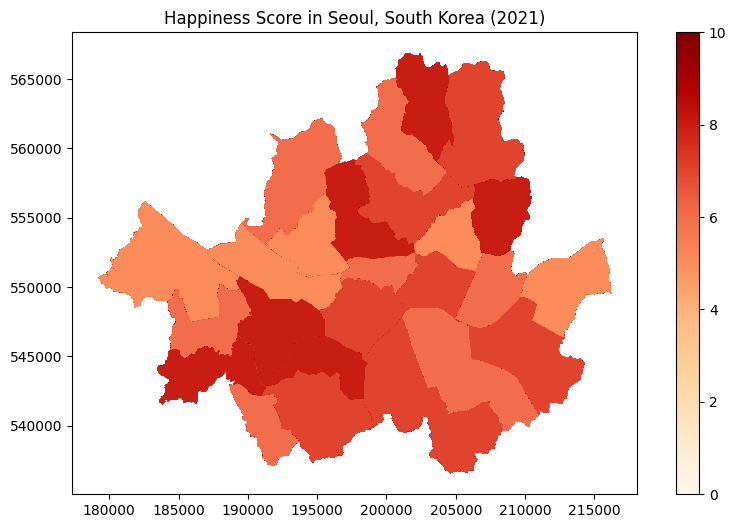

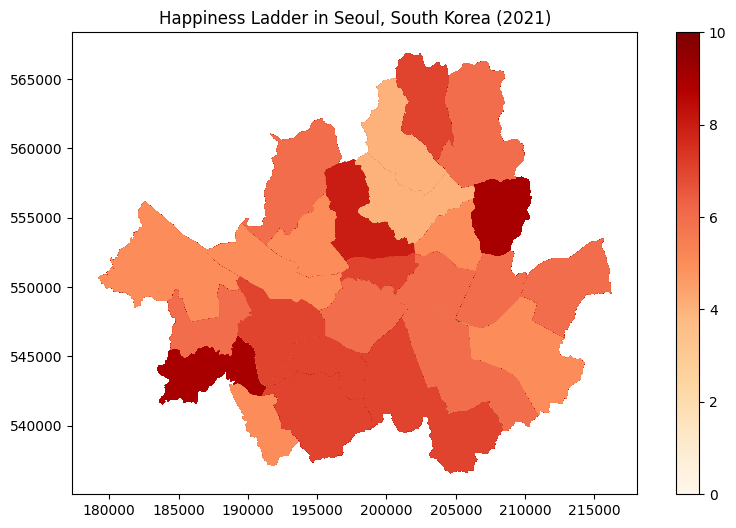

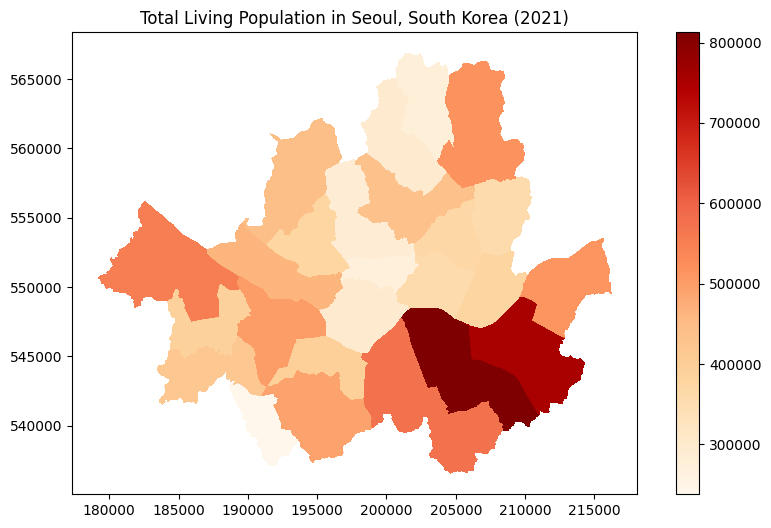

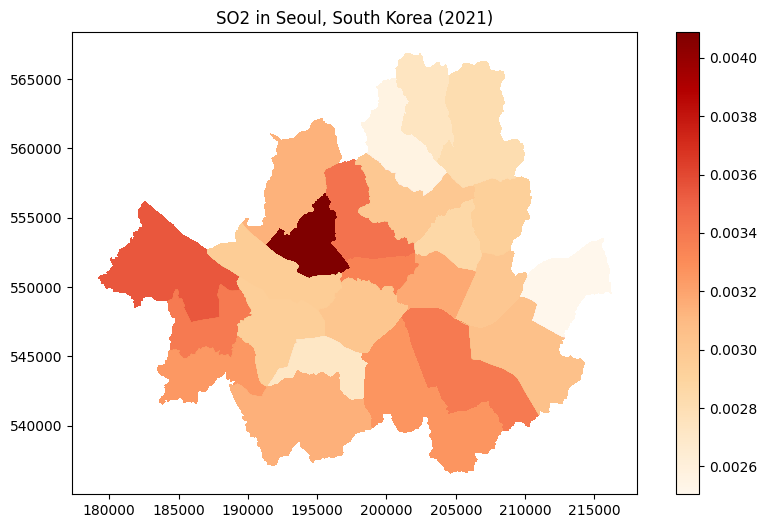

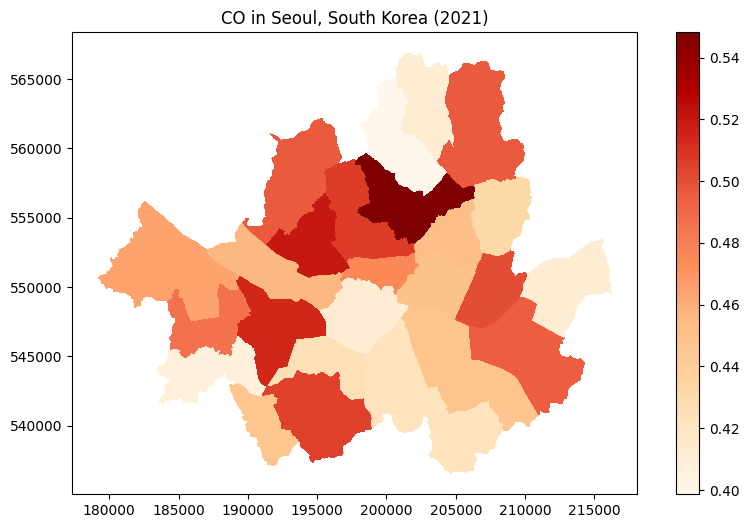

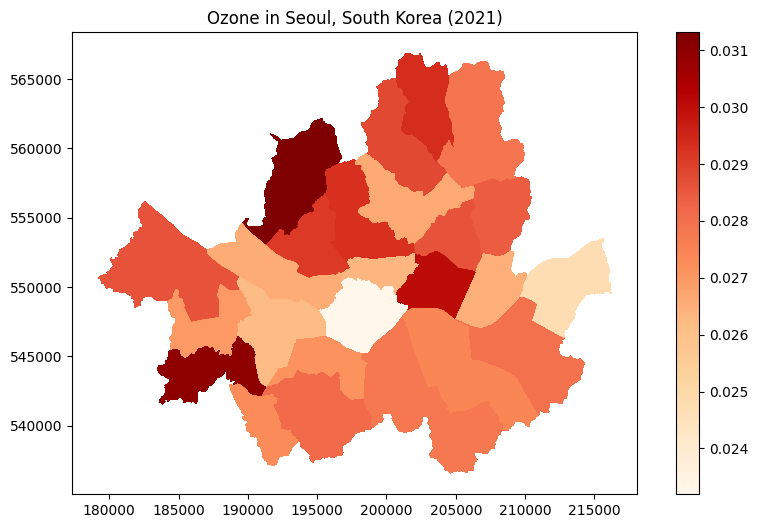

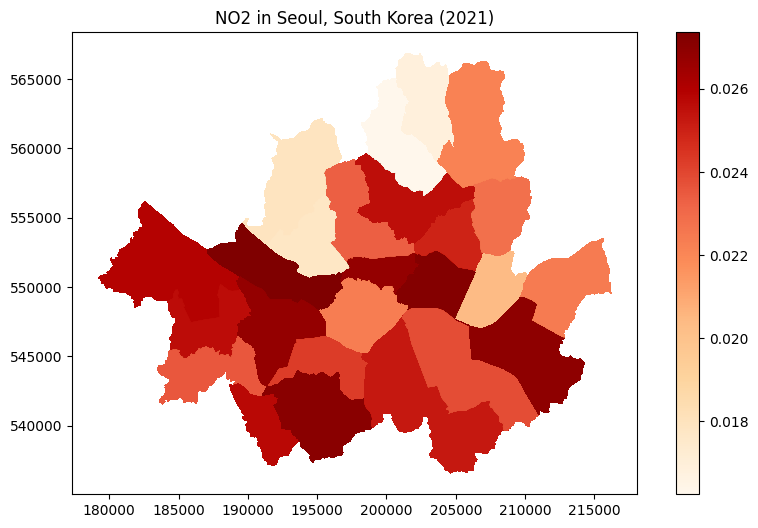

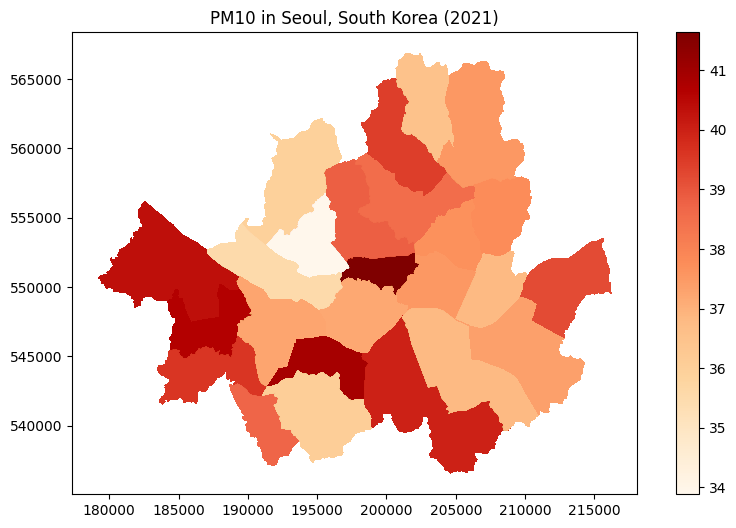

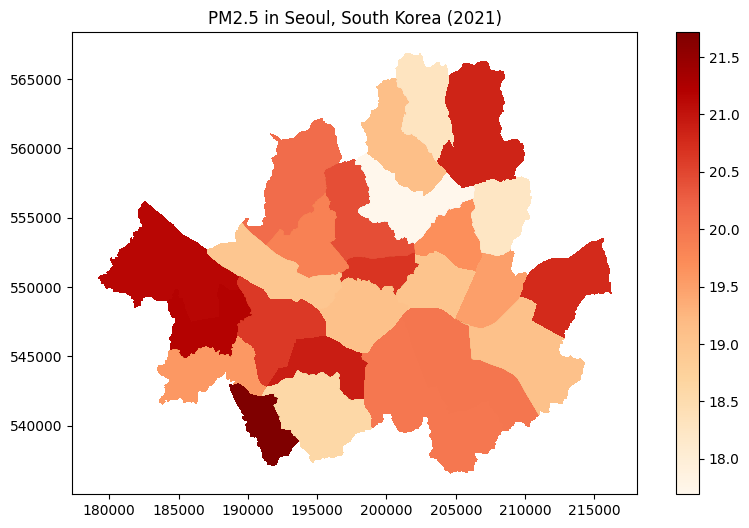

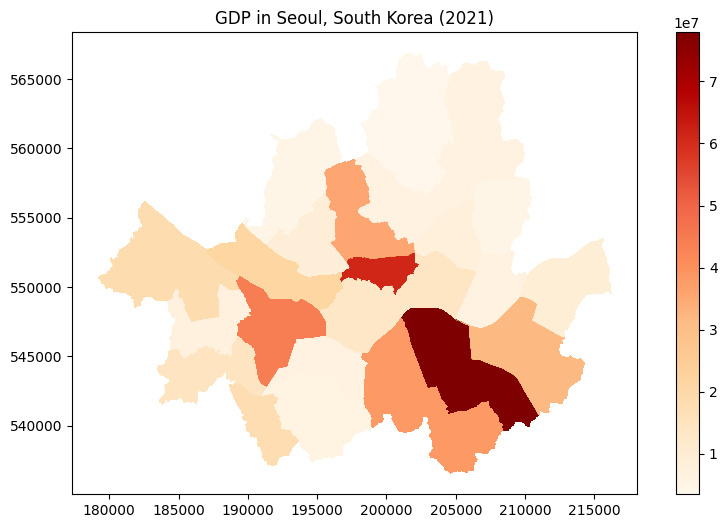

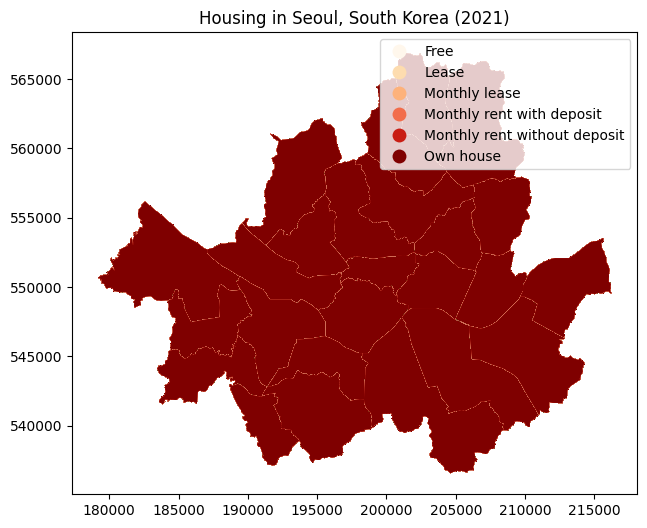

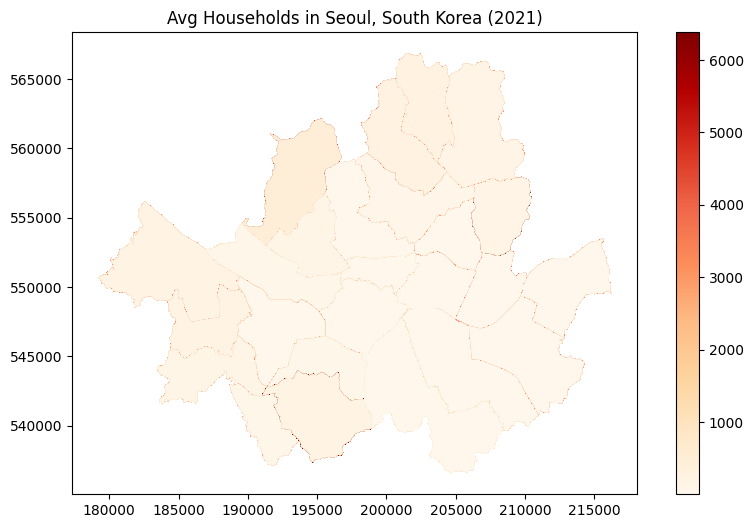

In [162]:
# List of columns to plot
columns_to_plot = ['happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP','housing', 'avg_households']

# List of column titles
columns_list = ['Happiness Score', 'Happiness Ladder', 'Total Living Population',
                'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP','Housing', 'Avg Households']

# Function to plot each column
def plot_geospatially(geodf, column, title):
    geodf.plot(column=column, legend=True, figsize=(10, 6), cmap='OrRd')
    plt.title(f'{title} in Seoul, South Korea (2021)')
    plt.show()

# Plot each column, use ses_map2021_sub instead of air_map2021_sub
for column, title in zip(columns_to_plot, columns_list):
    plot_geospatially(ses_map2021_sub, column, title) # Changed to ses_map2021_sub

I subsetted ownhouse

In [168]:
ses_map2021_ownh = ses_map2021_sub[ses_map2021_sub["housing"] == "Own house"]
ses_map2021_ownh

SGG_NM_gug        gungu  happiness_score  happiness_ladder  \
4          Jung-gu      Jung-gu              8.0               8.0   
9          Jung-gu      Jung-gu              8.0               7.0   
14         Jung-gu      Jung-gu              6.0               6.0   
19         Jung-gu      Jung-gu              7.0               7.0   
24         Jung-gu      Jung-gu              8.0               8.0   
...            ...          ...              ...               ...   
21096  Gangdong-gu  Gangdong-gu              6.0               7.0   
21102  Gangdong-gu  Gangdong-gu              6.0               7.0   
21108  Gangdong-gu  Gangdong-gu              6.0               7.0   
21114  Gangdong-gu  Gangdong-gu              6.0               7.0   
21120  Gangdong-gu  Gangdong-gu              5.0               6.0   

       TotalLivingPopulation       SO2        CO     Ozone       NO2  \
4              271742.081631  0.003348  0.475342  0.026351  0.026753   
9              271742.081631  0.003348  0.475342  0.026351  0.026753   
14             271742.081631  0.003348  0.475342  0.026351  0.026753   
19             271742.081631  0.003348  0.475342  0.026351  0.026753   
24             271742.081631  0.003348  0.475342  0.026351  0.026753   
...                      ...       ...       ...       ...       ...   
21096          513315.209157  0.002504  0.411507  0.024753  0.022441   
21102          513315.209157  0.002504  0.411507  0.024753  0.022441   
21108          513315.209157  0.002504  0.411507  0.024753  0.022441   
21114          513315.209157  0.002504  0.411507  0.024753  0.022441   
21120          513315.209157  0.002504  0.411507  0.024753  0.022441   

            PM10      PM2.5       GDP    housing  avg_households  \
4      41.638356  20.665753  61342710  Own house       13.250000   
9      41.638356  20.665753  61342710  Own house       13.250000   
14     41.638356  20.665753  61342710  Own house       13.250000   
19     41.638356  20.665753  61342710  Own house       13.250000   
24     41.638356  20.665753  61342710  Own house       13.250000   
...          ...        ...       ...        ...             ...   
21096  39.189041  20.769231   9364063  Own house       29.833333   
21102  39.189041  20.769231   9364063  Own house       29.833333   
21108  39.189041  20.769231   9364063  Own house       29.833333   
21114  39.189041  20.769231   9364063  Own house       29.833333   
21120  39.189041  20.769231   9364063  Own house       29.833333   

                                                geometry  
4      POLYGON ((202072.448 552243.432, 202072.646 55...  
9      POLYGON ((202072.448 552243.432, 202072.646 55...  
14     POLYGON ((202072.448 552243.432, 202072.646 55...  
19     POLYGON ((202072.448 552243.432, 202072.646 55...  
24     POLYGON ((202072.448 552243.432, 202072.646 55...  
...                                                  ...  
21096  POLYGON ((215841.933 552101.057, 215843.046 55...  
21102  POLYGON ((215841.933 552101.057, 215843.046 55...  
21108  POLYGON ((215841.933 552101.057, 215843.046 55...  
21114  POLYGON ((215841.933 552101.057, 215843.046 55...  
21120  POLYGON ((215841.933 552101.057, 215843.046 55...  

[3601 rows x 15 columns]

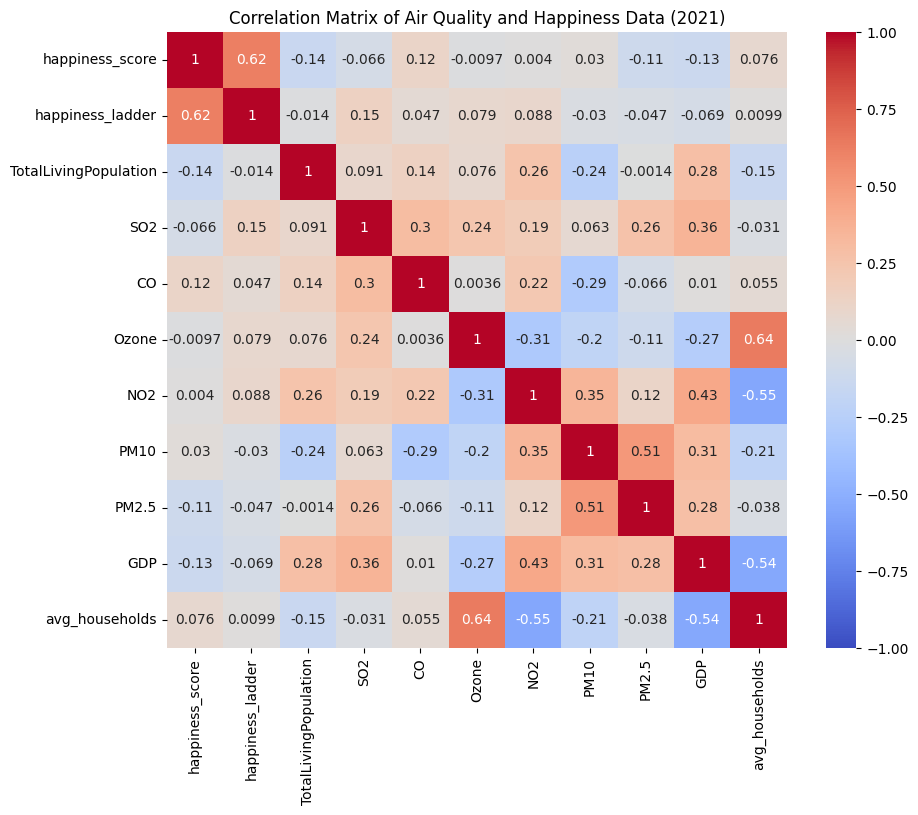

In [169]:
# Calculate the correlation matrix
correlation_matrix = ses_map2021_ownh[['happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP', 'avg_households']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Air Quality and Happiness Data (2021)')
plt.show()

In [56]:
import seaborn as sns

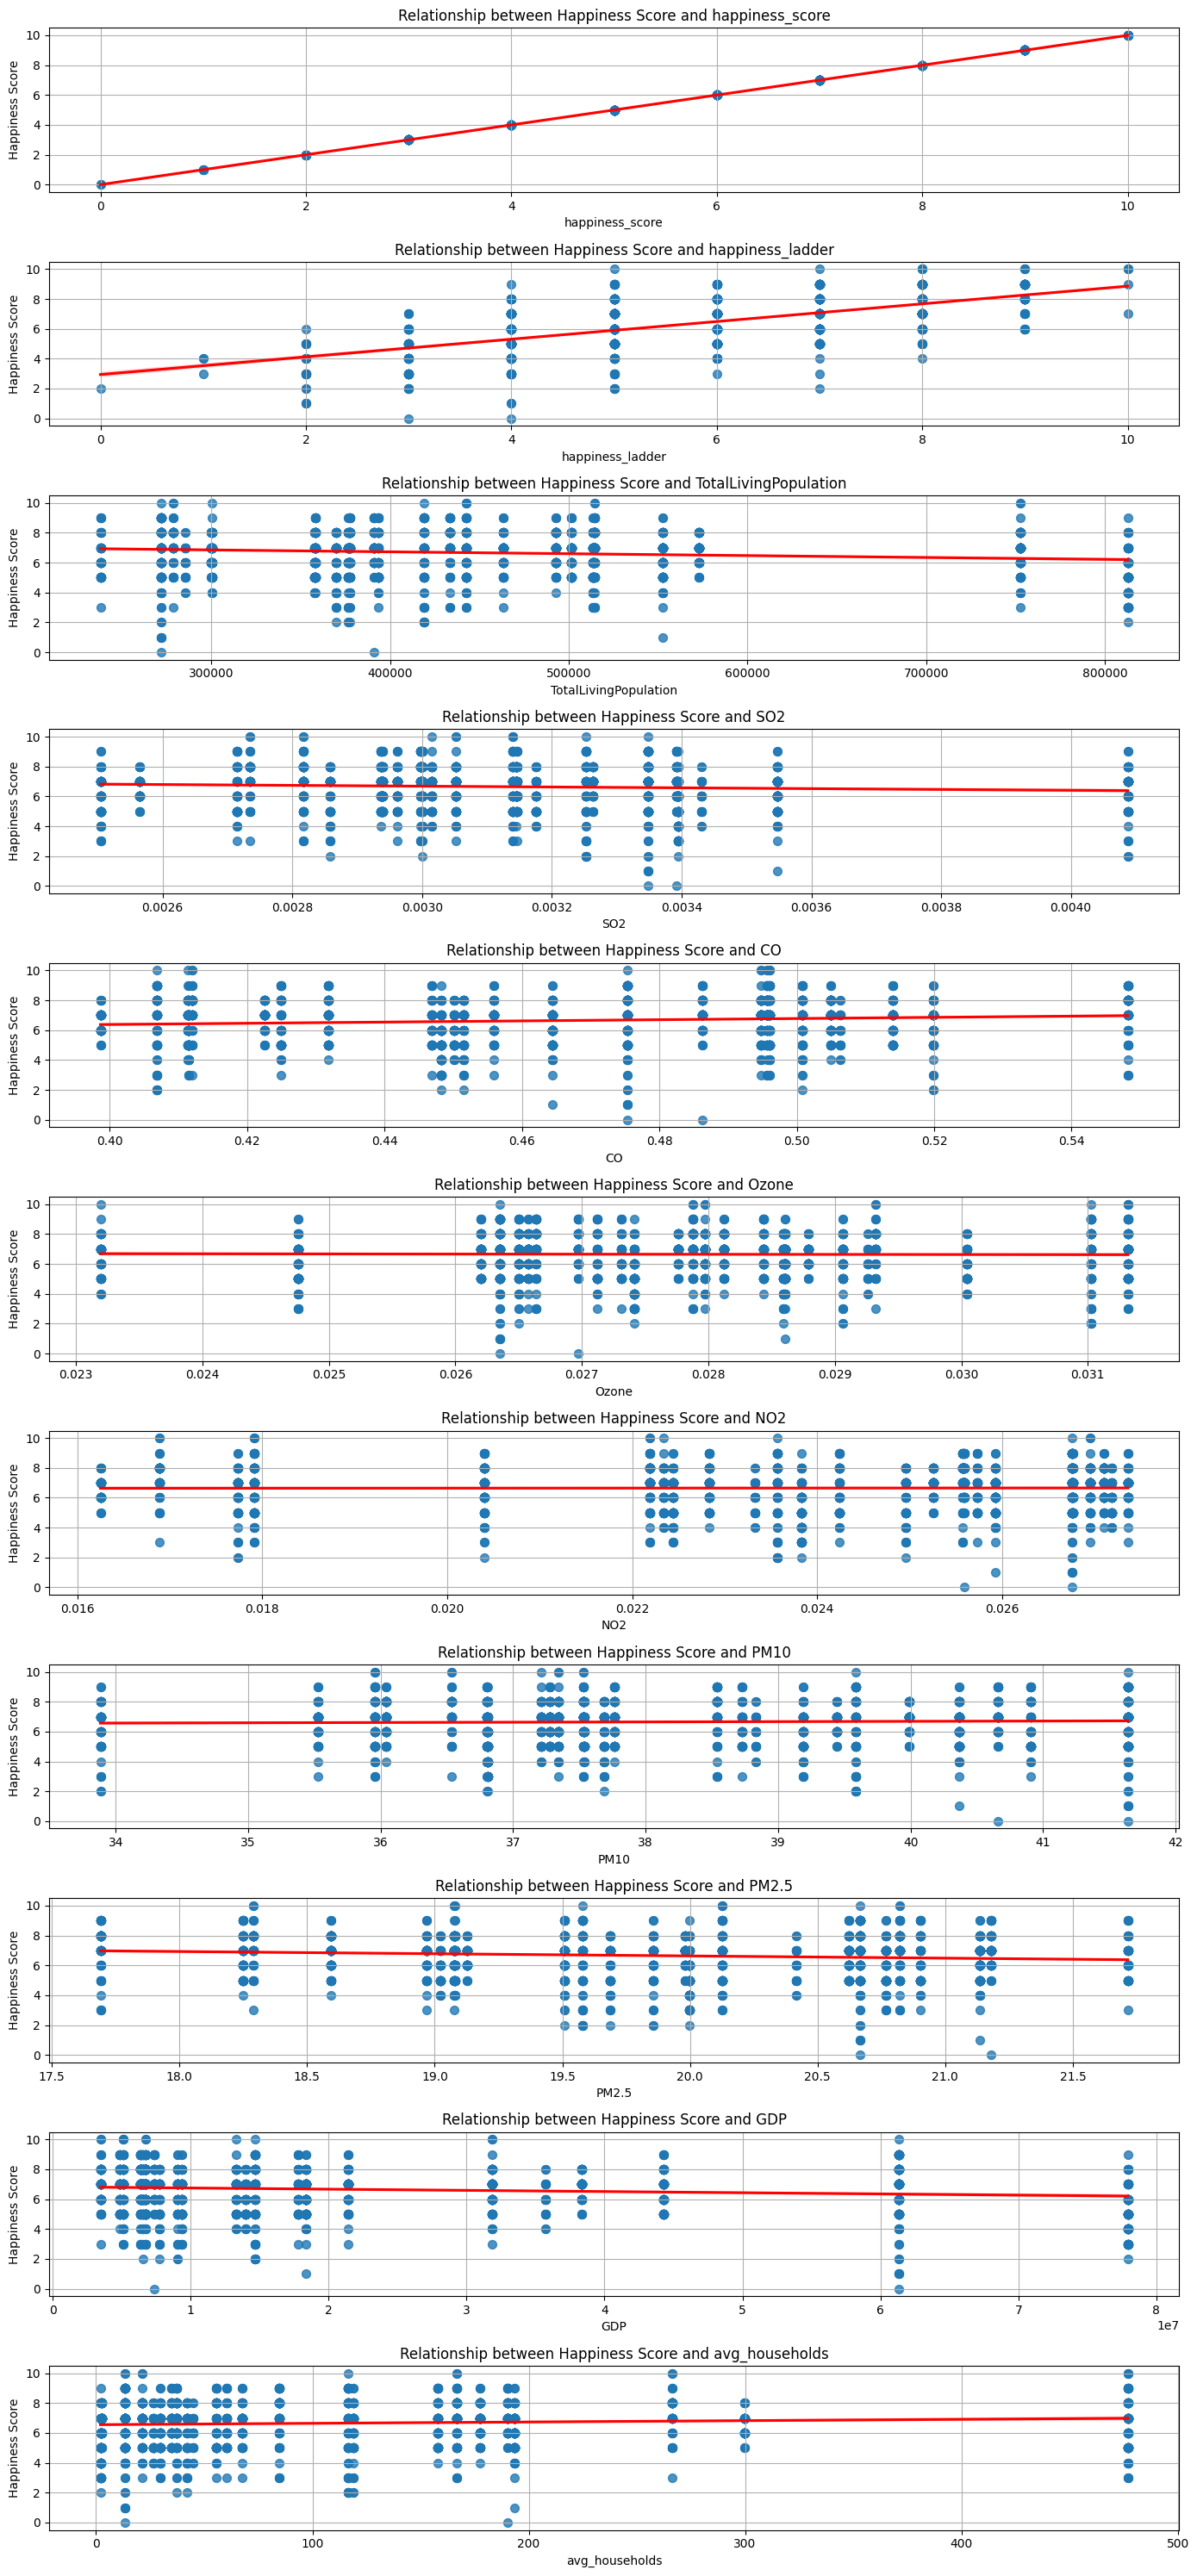

In [171]:
# Columns to plot against happiness_score
columns_to_plot = ['happiness_score', 'happiness_ladder','TotalLivingPopulation',
        'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5', 'GDP', 'avg_households']

# Create subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(14, 30))

for i, column in enumerate(columns_to_plot):
    # Plot happiness_score vs column
    sns.regplot(x=column, y='happiness_score', data = ses_map2021_ownh, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Happiness Score')
    axs[i].set_title(f'Relationship between Happiness Score and {column}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()